In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [47]:
df.shape


(545, 13)

In [48]:
df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [50]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [51]:
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [52]:
numeric_features = df.select_dtypes(include=[np.number]).columns
numeric_features

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

<Axes: >

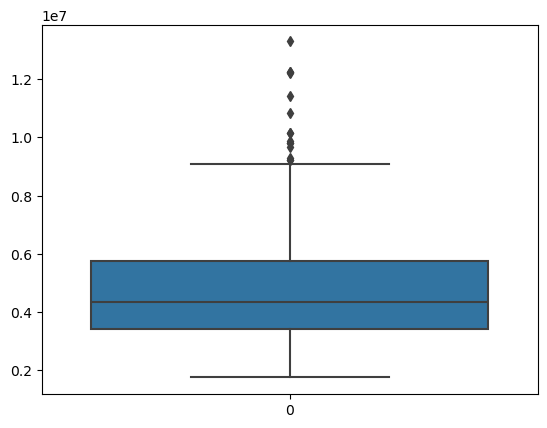

In [53]:
sns.boxplot(df['price'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

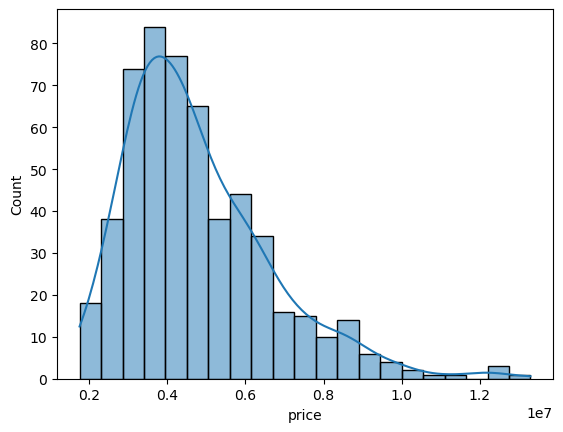

In [54]:
sns.histplot(df['price'], kde=True)


In [55]:
df['price'].describe()


count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

<Axes: >

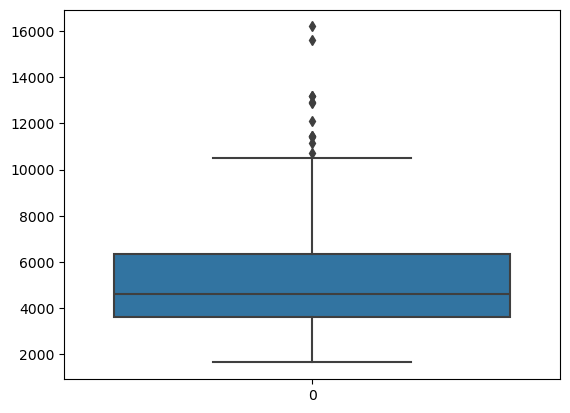

In [56]:
sns.boxplot(df['area'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Count'>

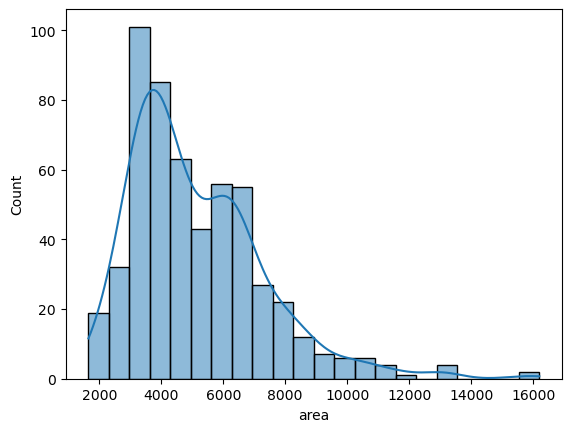

In [57]:
sns.histplot(data=df, x='area', kde=True)


In [58]:
z_scores = (df['area'] - np.mean(df['area'])) / np.std(df['area'])
outliers = np.abs(z_scores) > 3
outliers.sum()


7

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Count'>

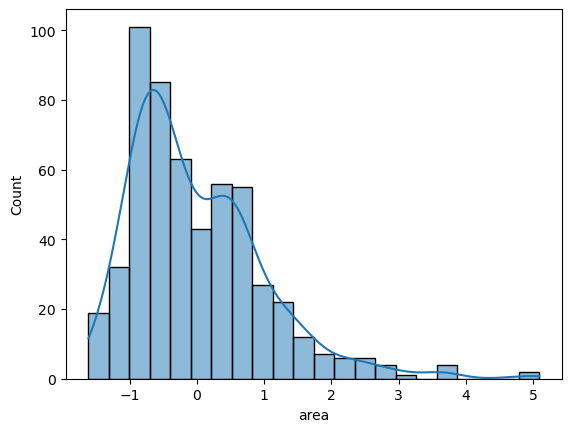

In [59]:
sns.histplot(z_scores, kde=True)


Text(0.5, 1.0, 'Boxplot without outliers')

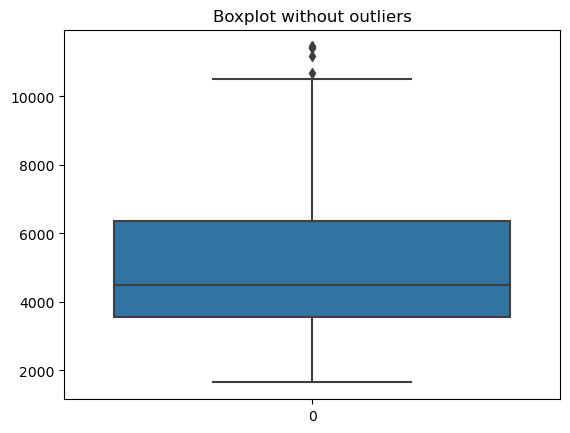

In [60]:
sns.boxplot(df[~outliers]['area']).set_title('Boxplot without outliers')


In [61]:
df['bedrooms'].describe()

count    545.000000
mean       2.965138
std        0.738064
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: bedrooms, dtype: float64

In [62]:
df['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

<Axes: xlabel='bedrooms'>

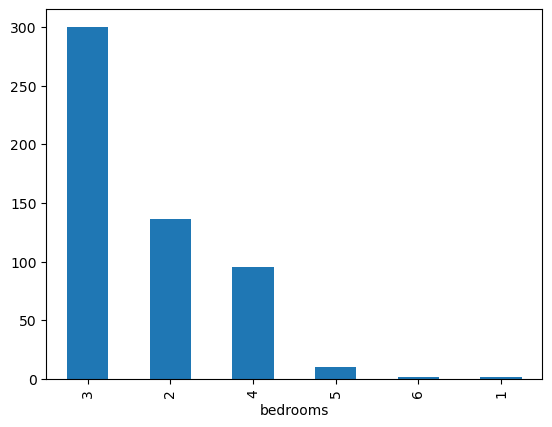

In [63]:
df['bedrooms'].value_counts().plot(kind='bar')

<Axes: >

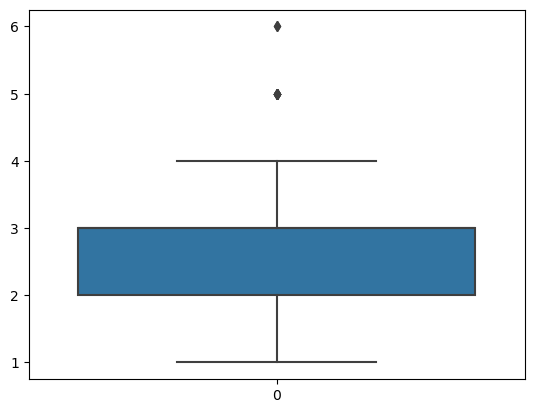

In [64]:
sns.boxplot(df['bedrooms'])

In [65]:
bedrooms_outliers = (df['bedrooms'] >= 5) 
bedrooms_outliers.sum()


12

In [66]:
df['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [67]:
df['stories'].value_counts()


stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

In [68]:
df['parking'].value_counts()


parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [69]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [70]:
df['mainroad'].value_counts(normalize=True)


mainroad
yes    0.858716
no     0.141284
Name: proportion, dtype: float64

In [71]:
df['guestroom'].value_counts()


guestroom
no     448
yes     97
Name: count, dtype: int64

In [72]:
df['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [74]:
df['hotwaterheating'].value_counts(normalize=True)

hotwaterheating
no     0.954128
yes    0.045872
Name: proportion, dtype: float64

In [76]:
df['airconditioning'].value_counts(normalize=True)

airconditioning
no     0.684404
yes    0.315596
Name: proportion, dtype: float64

In [77]:
df['prefarea'].value_counts(normalize=True)

prefarea
no     0.765138
yes    0.234862
Name: proportion, dtype: float64

<Axes: xlabel='furnishingstatus'>

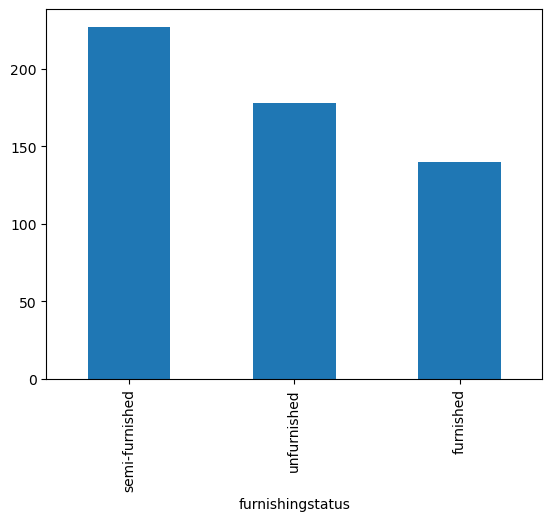

In [78]:
df['furnishingstatus'].value_counts().plot(kind='bar')


In [79]:
X = df.drop(['price'], axis=1)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

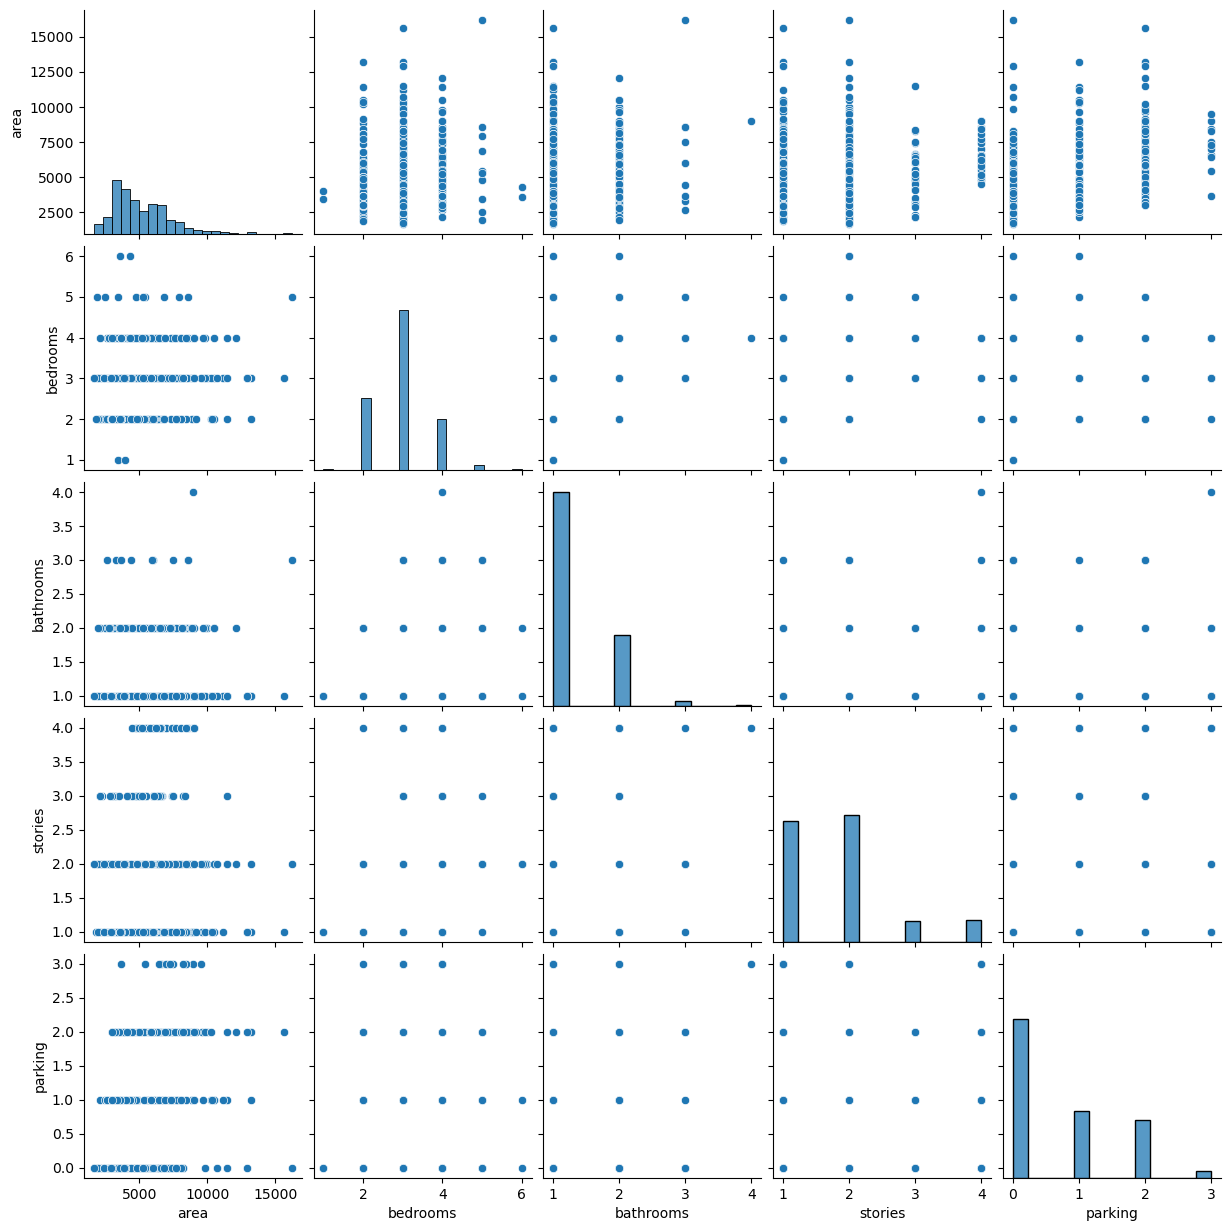

In [80]:
sns.pairplot(X.select_dtypes(exclude=['object']))

<Axes: >

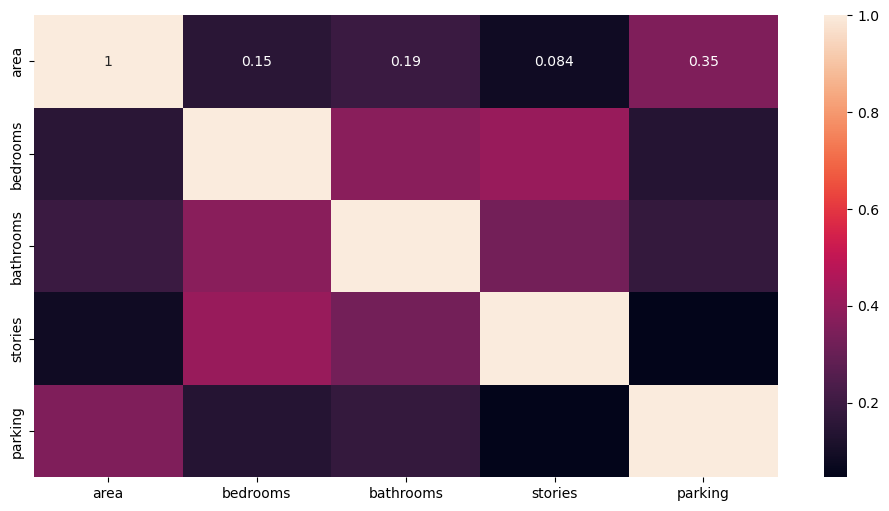

In [81]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(X.select_dtypes(exclude=['object']).corr(), annot=True)

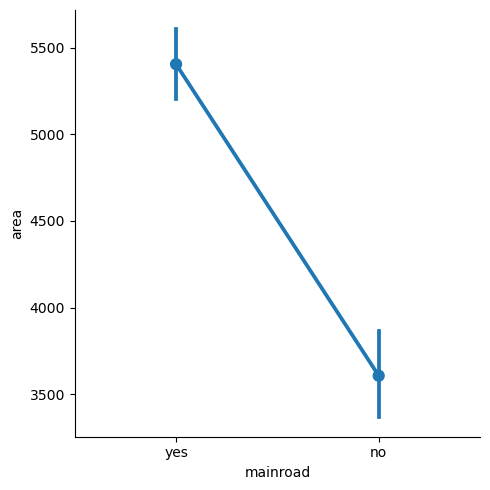

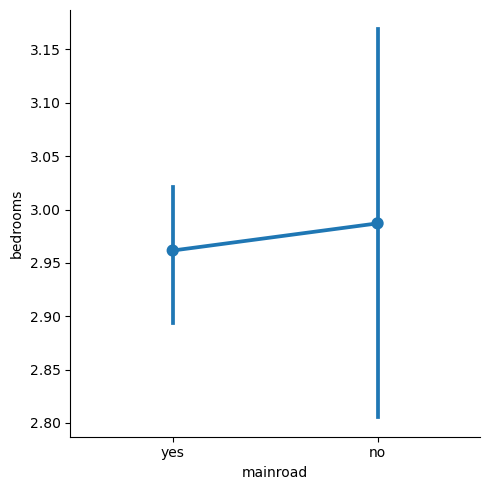

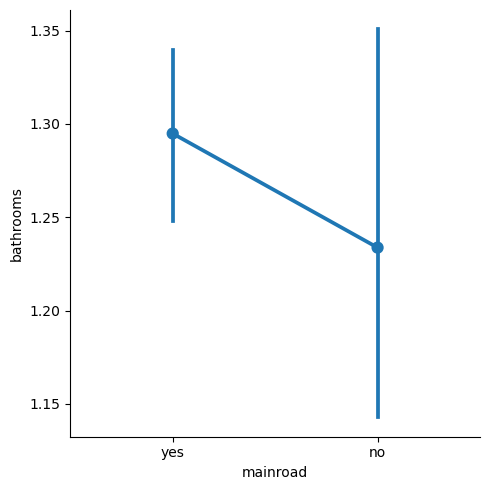

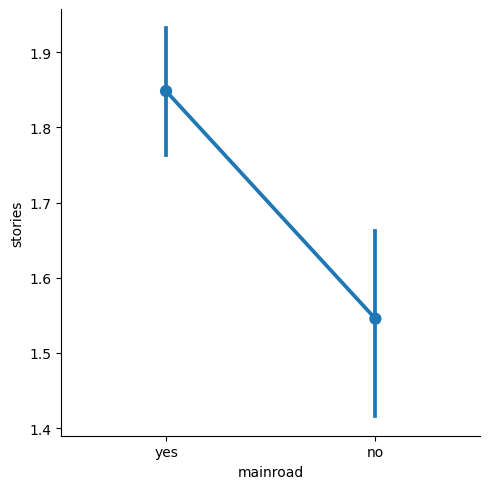

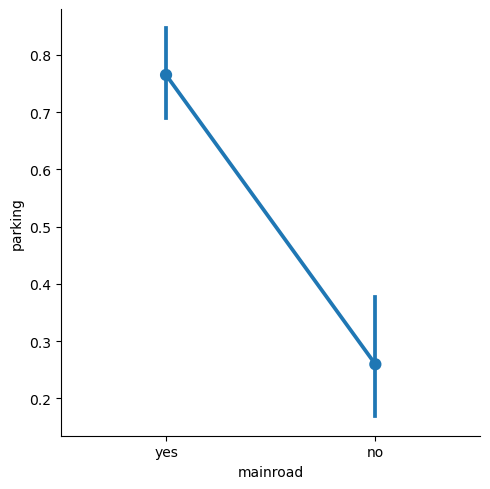

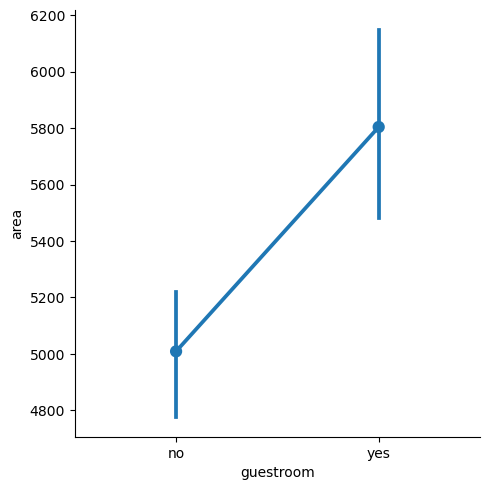

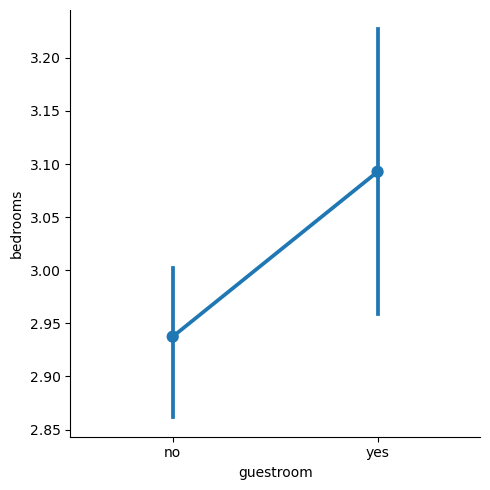

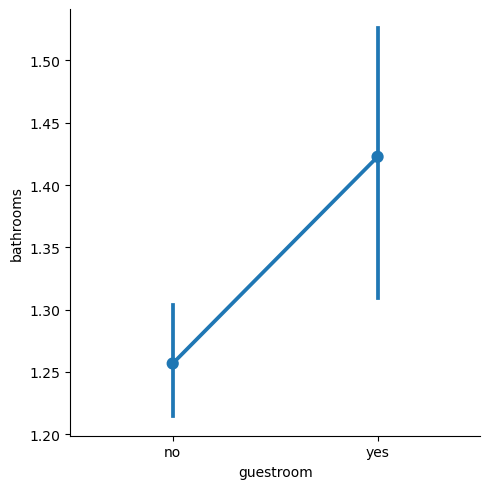

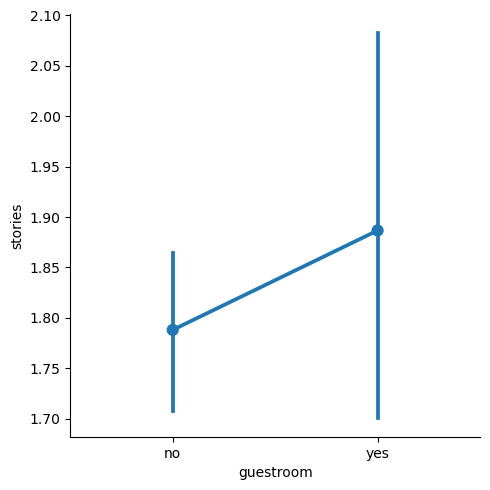

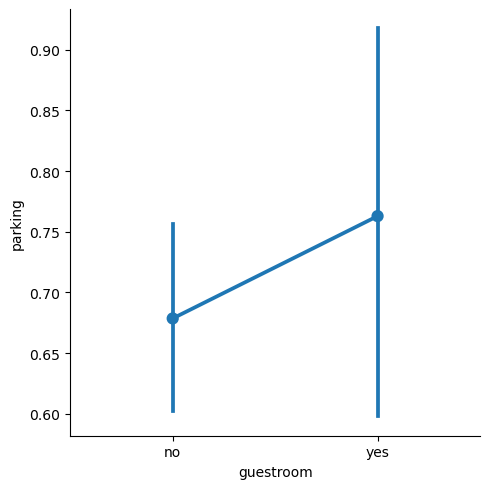

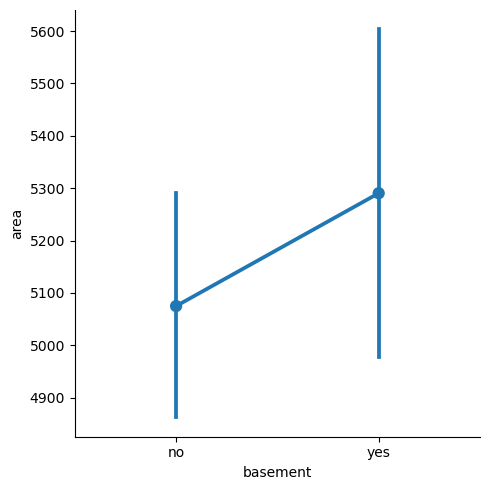

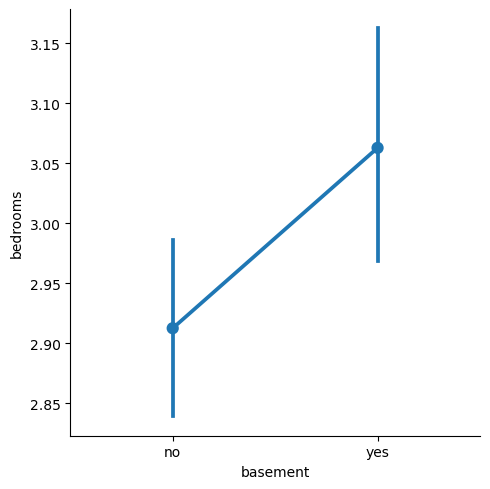

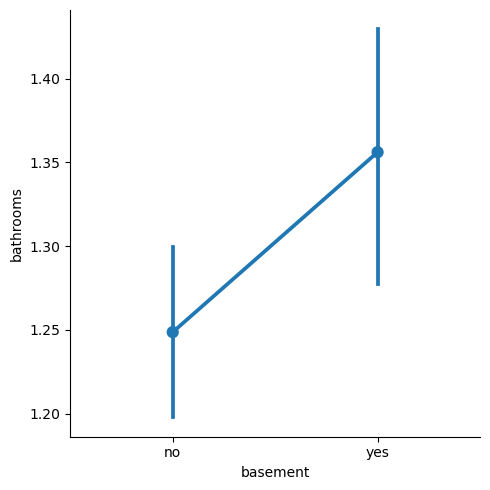

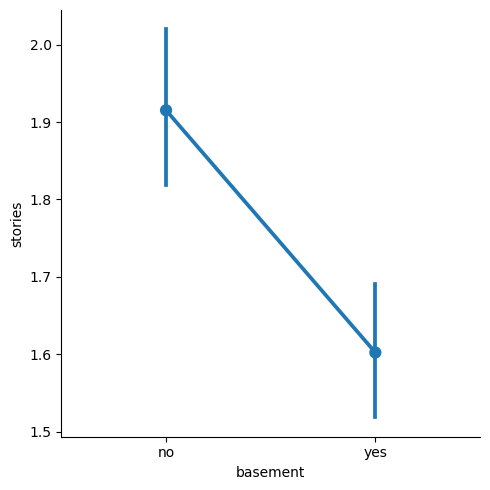

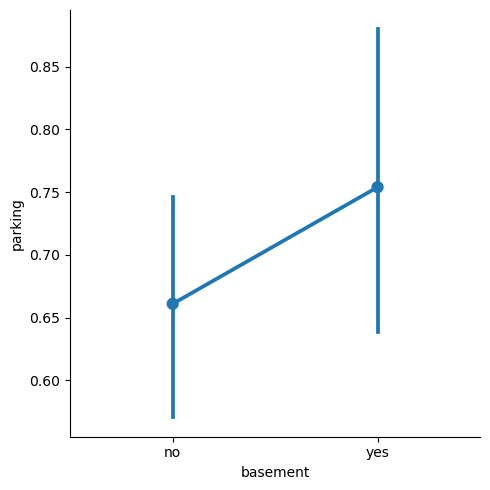

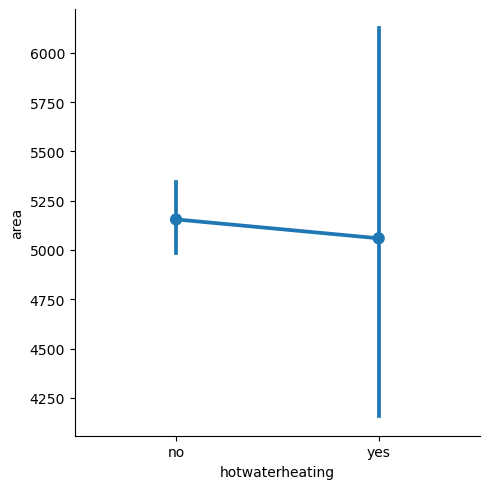

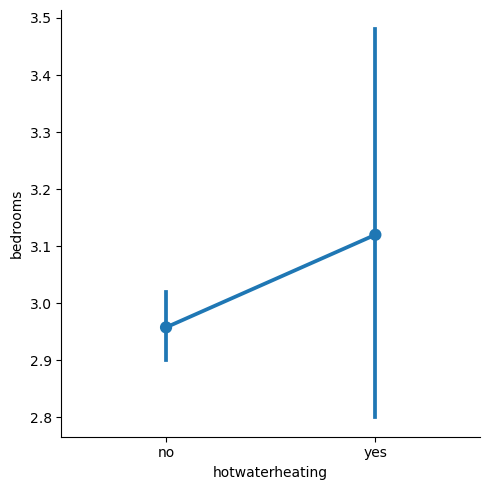

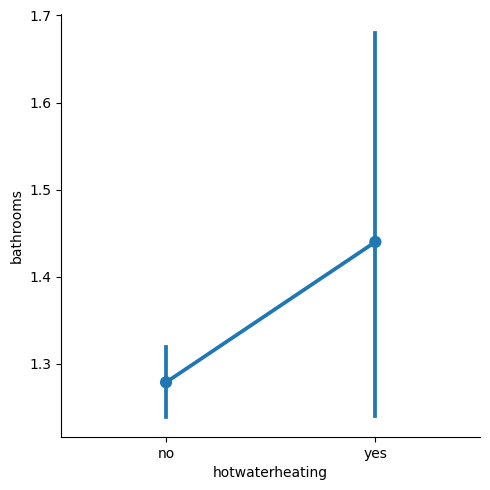

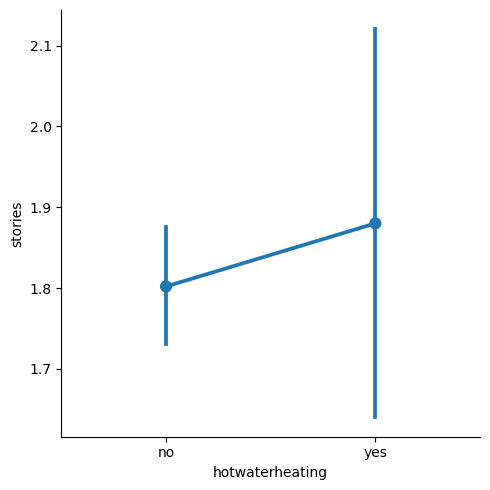

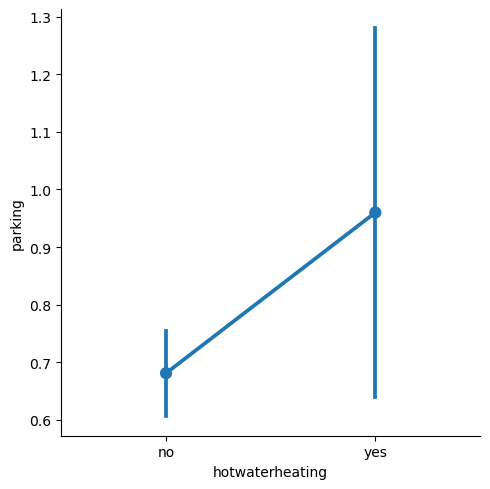

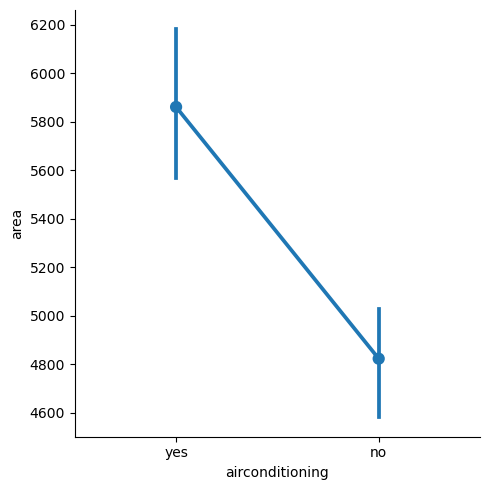

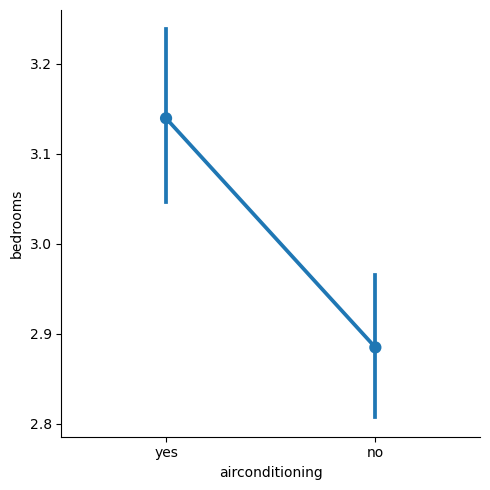

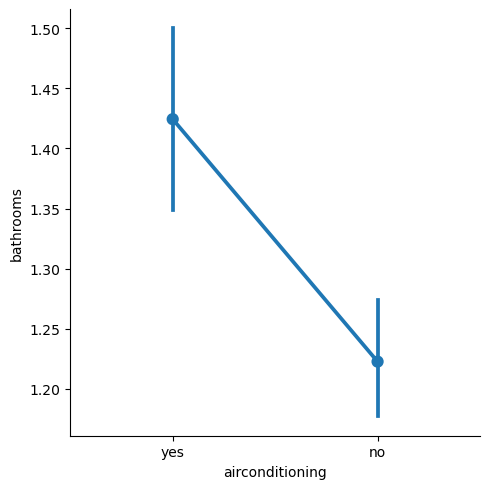

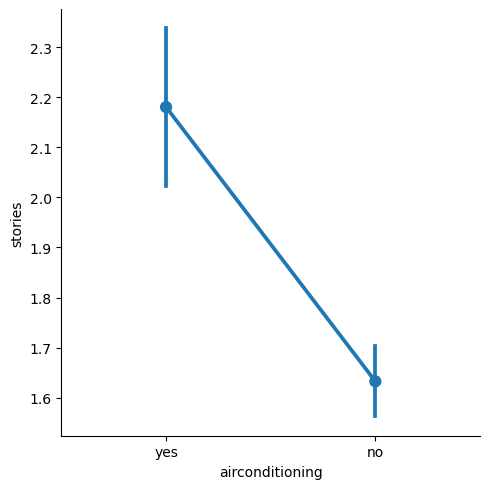

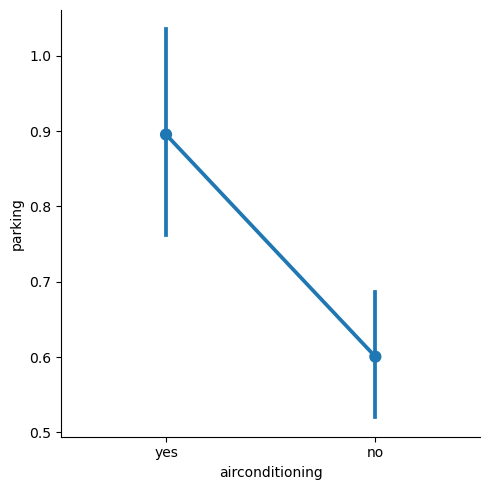

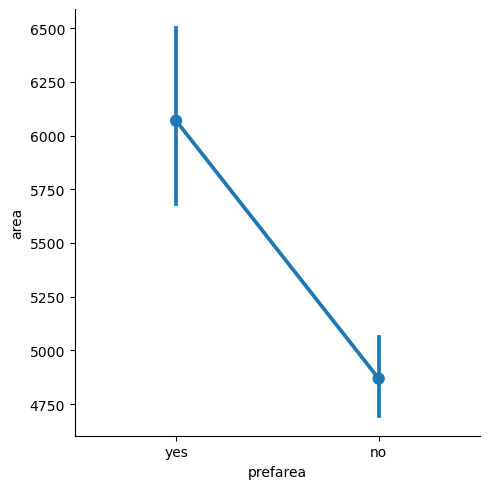

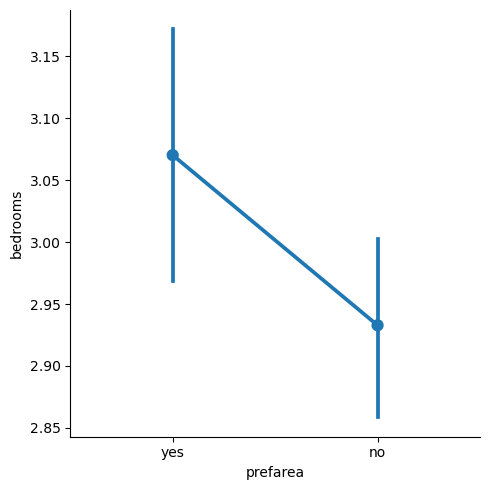

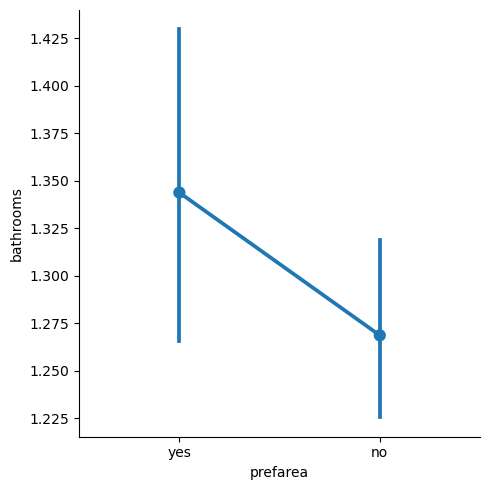

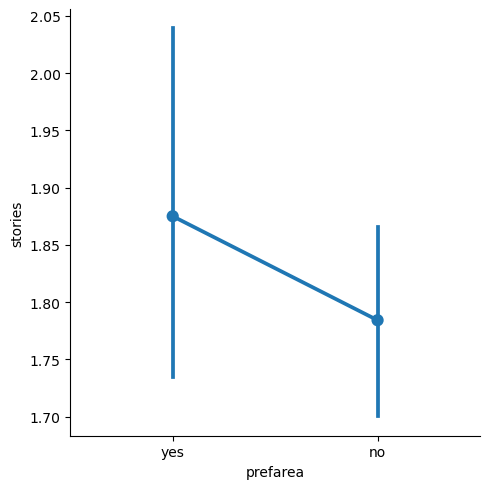

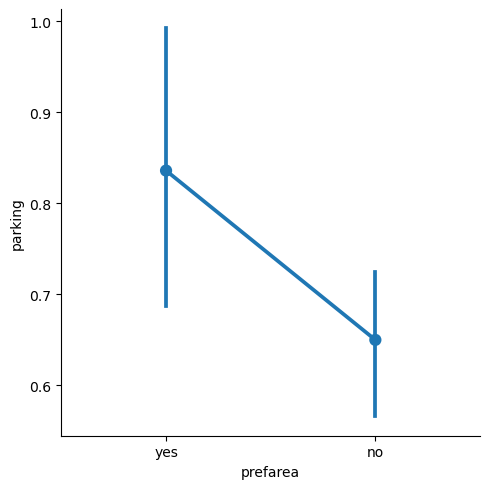

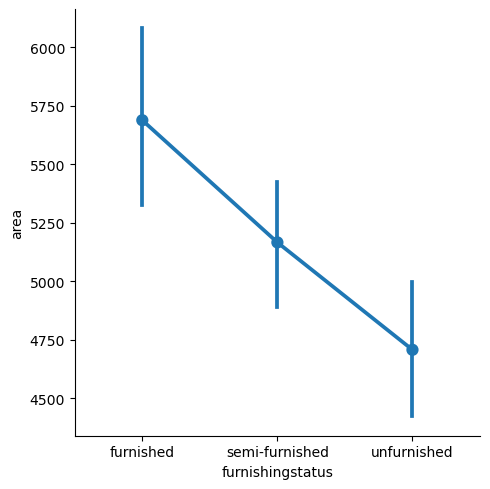

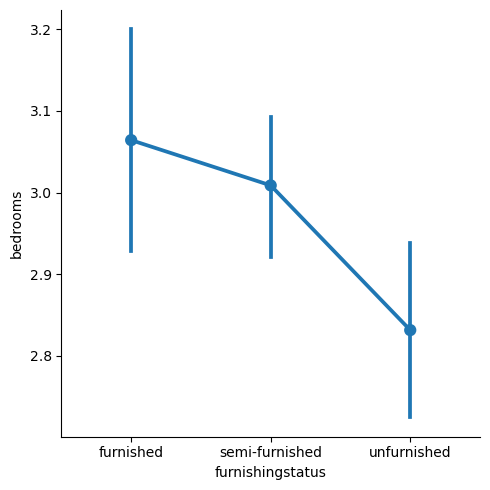

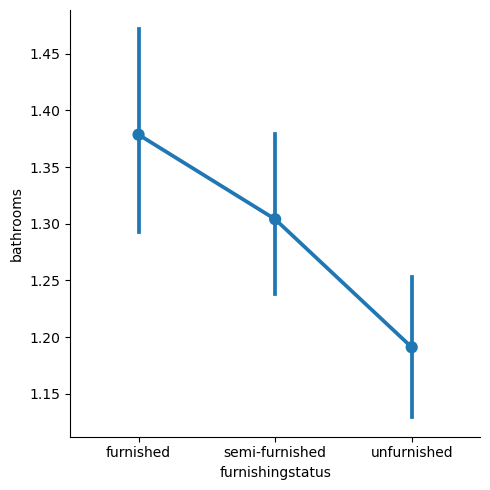

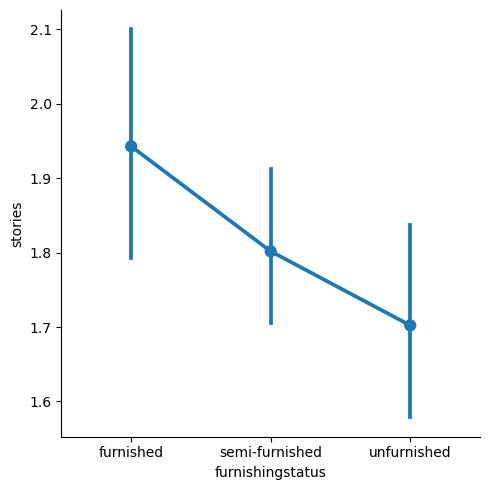

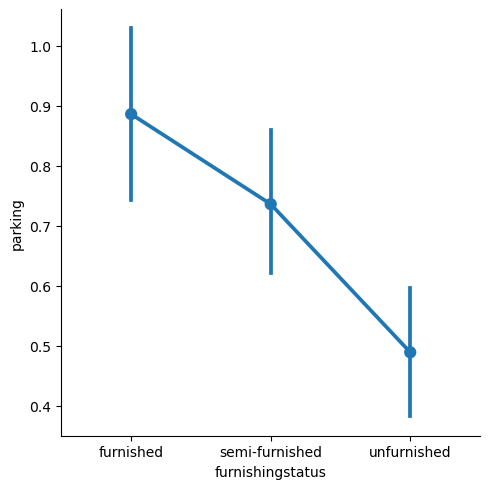

In [82]:
for categ in X.select_dtypes(include=['object']).columns:
    for num, col in enumerate(X.select_dtypes(exclude=['object']).columns):
        sns.catplot(x=categ, y=col, data=X, kind='point')
        plt.show()

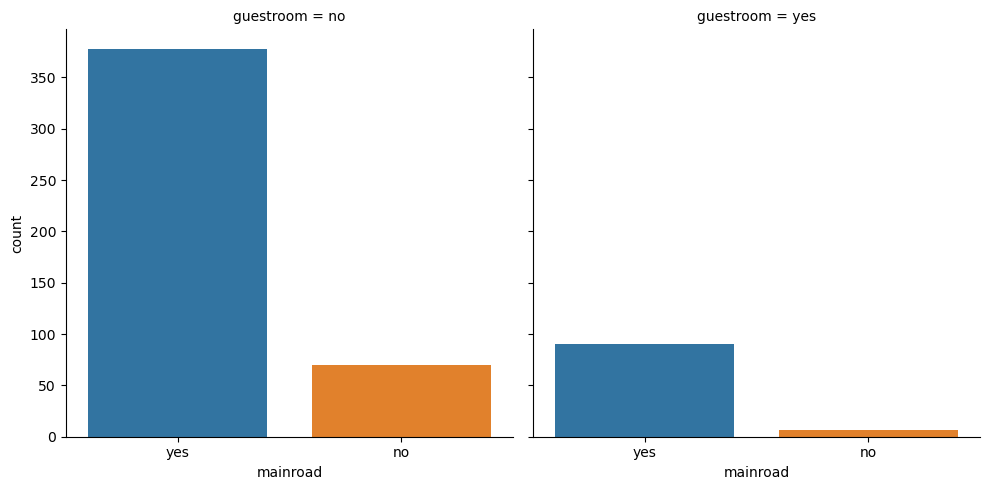

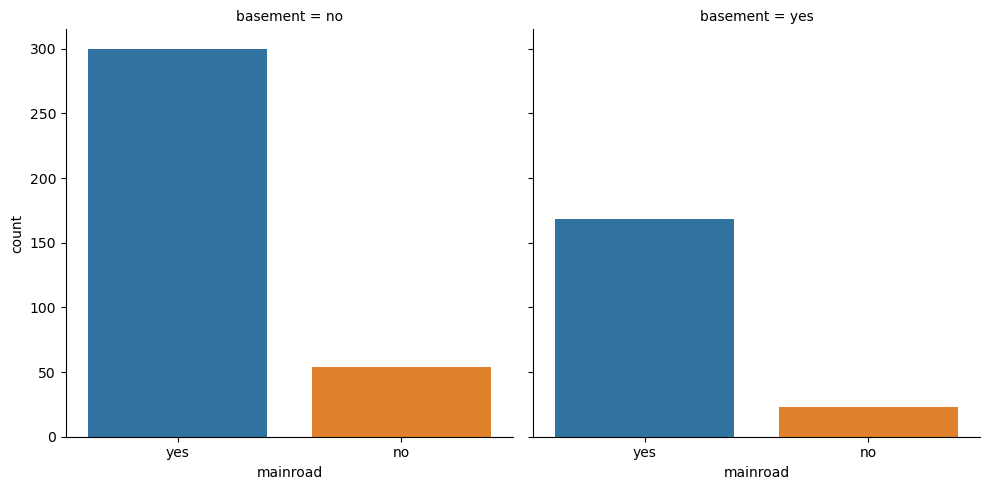

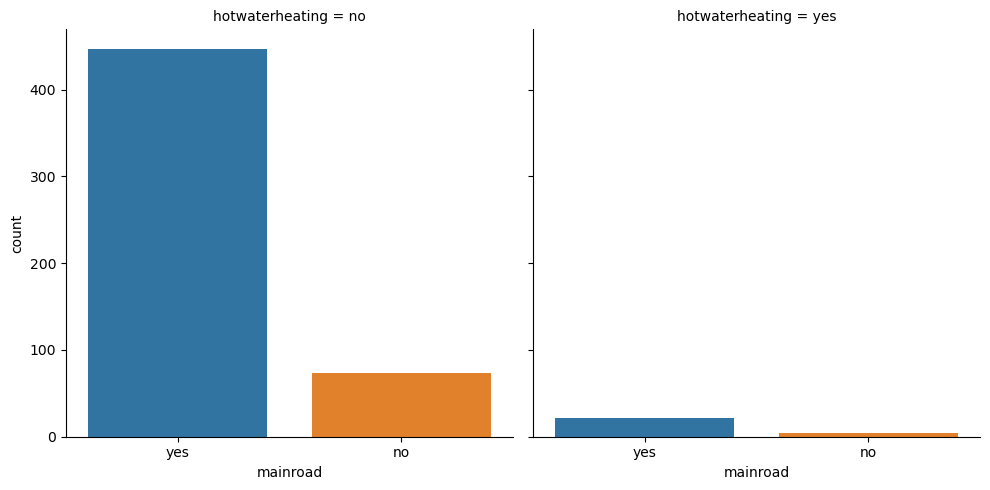

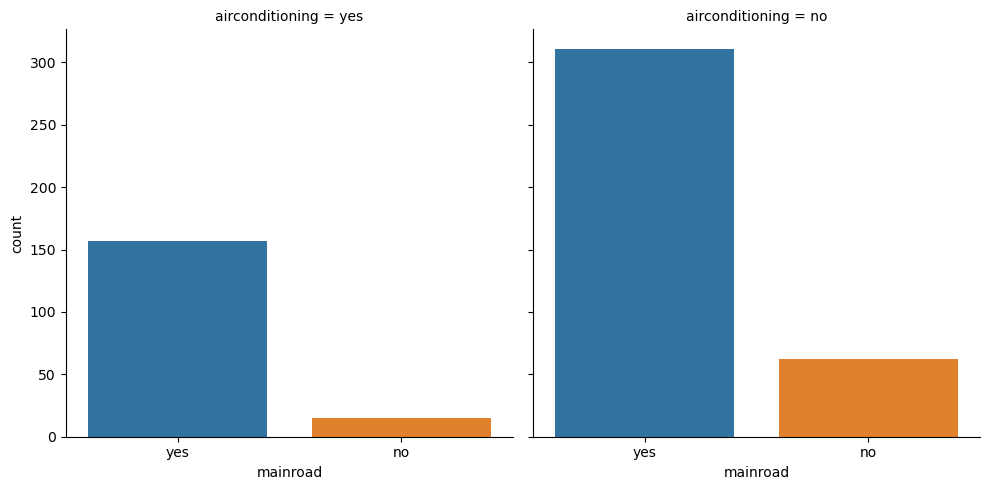

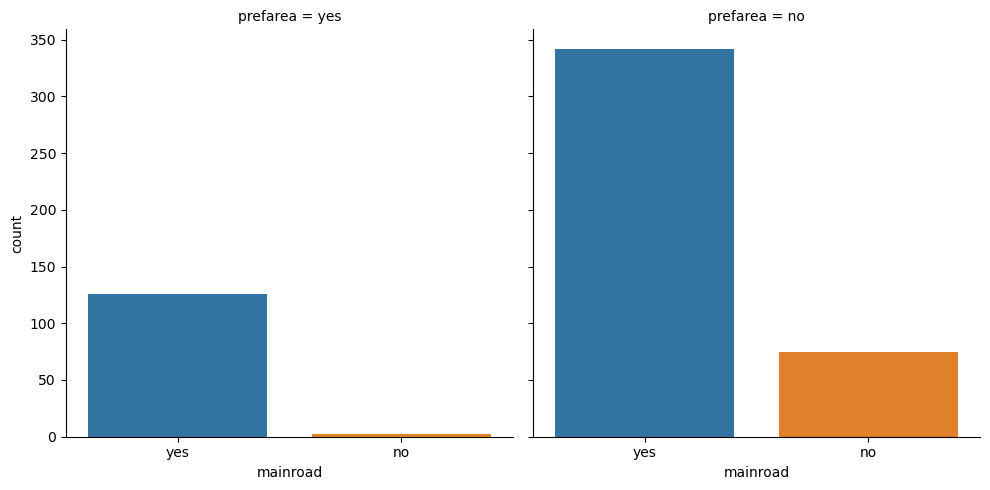

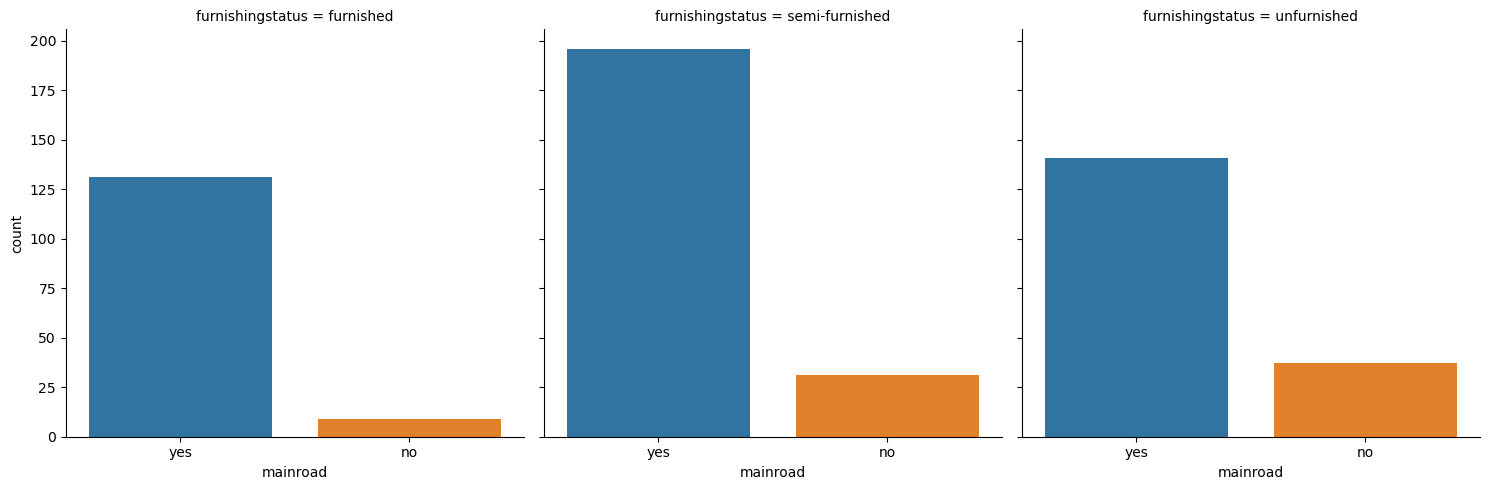

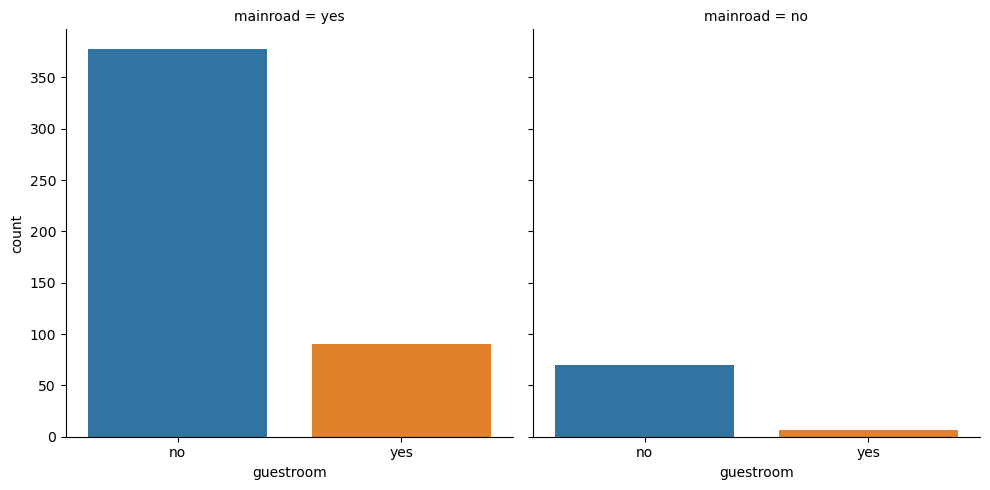

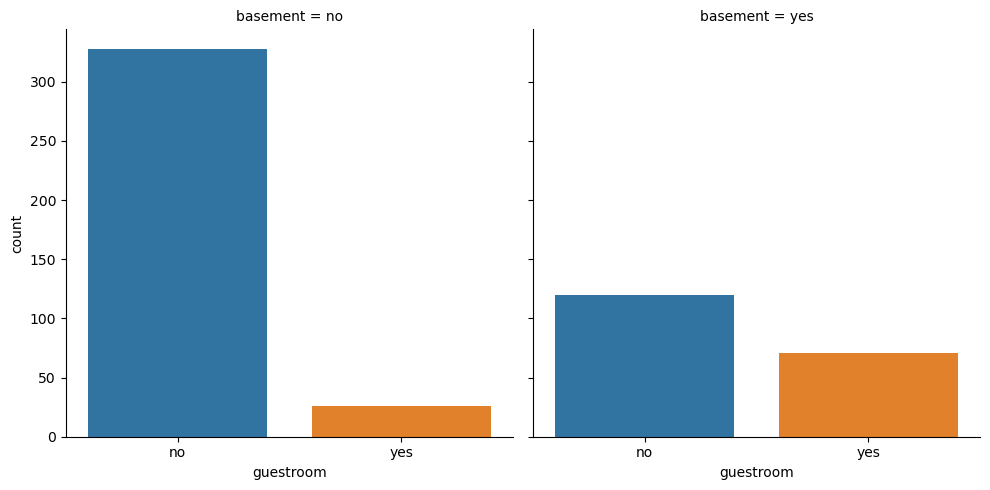

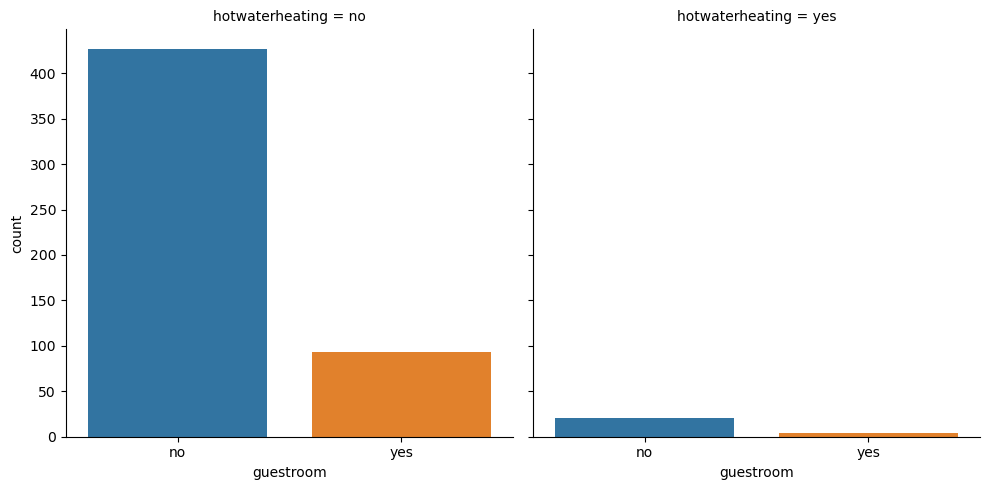

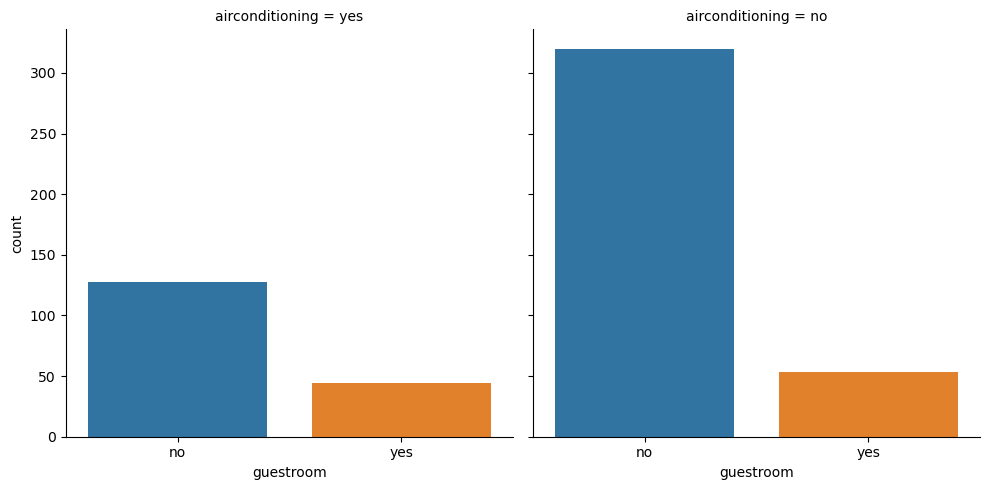

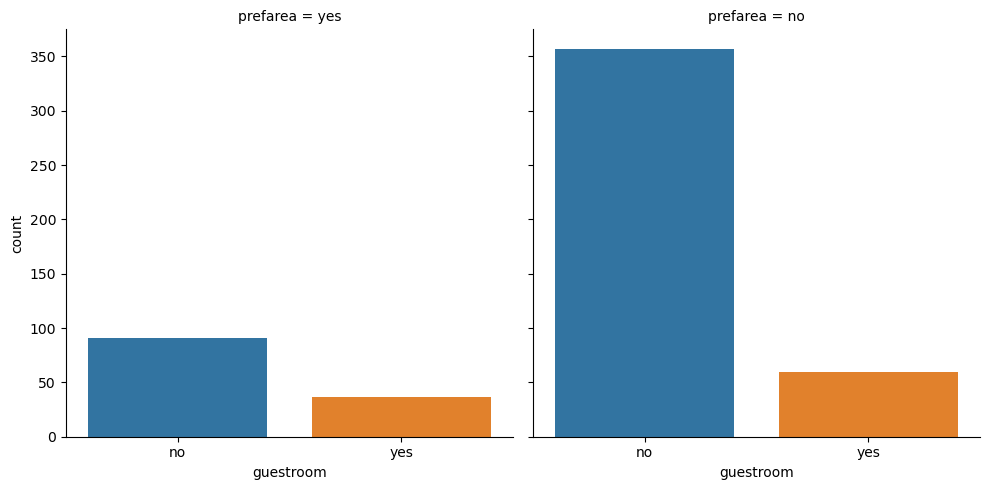

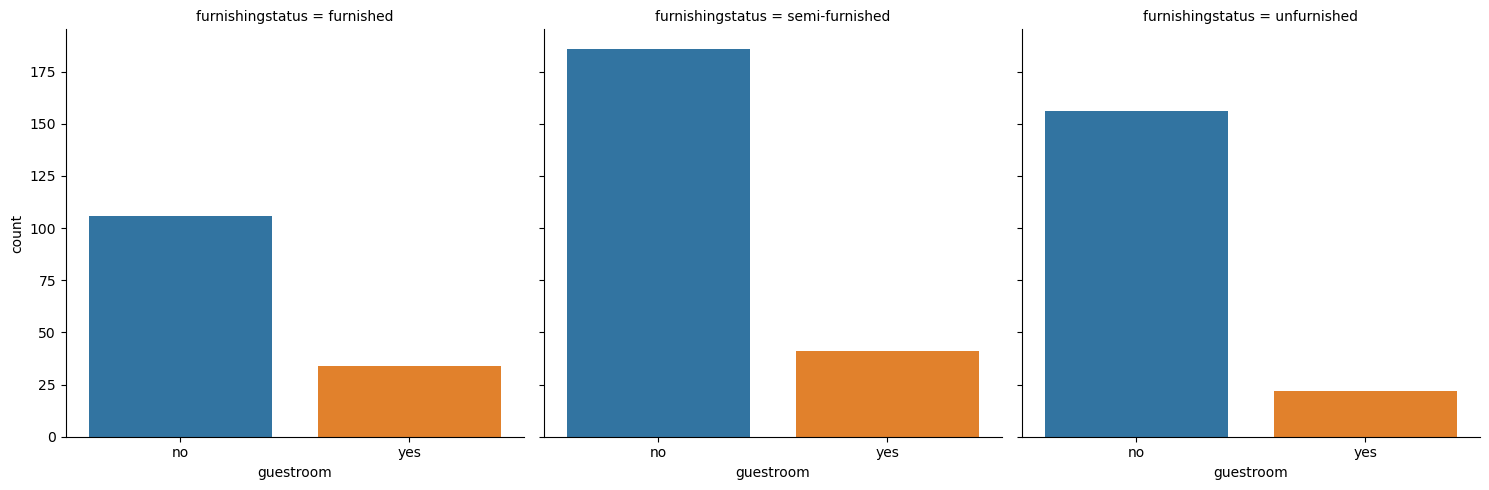

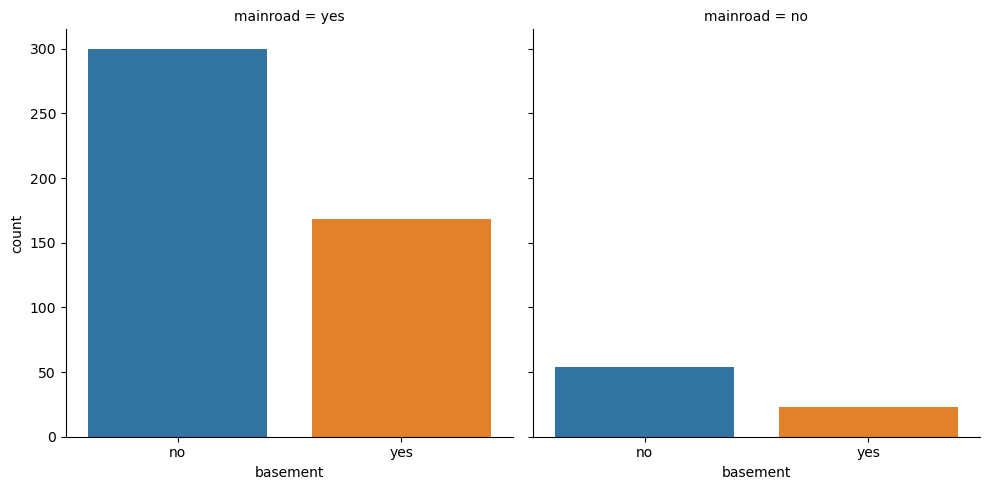

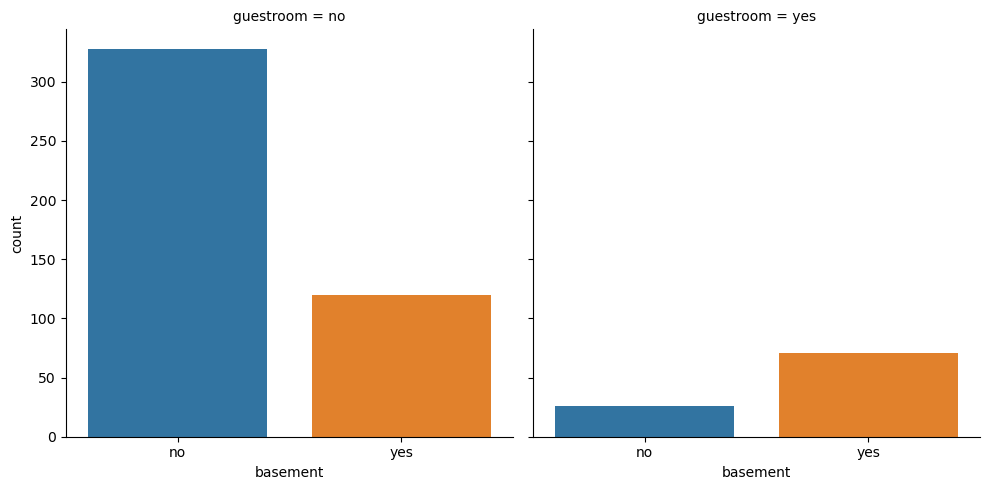

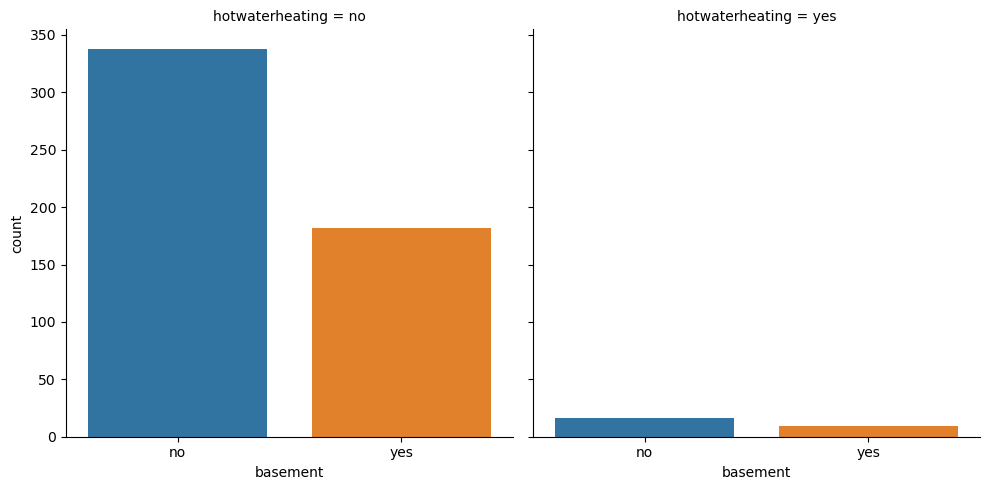

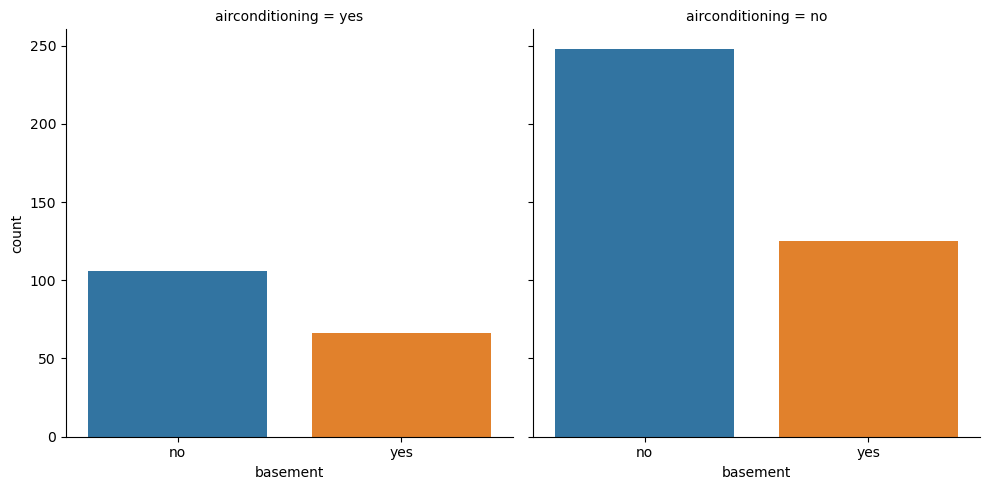

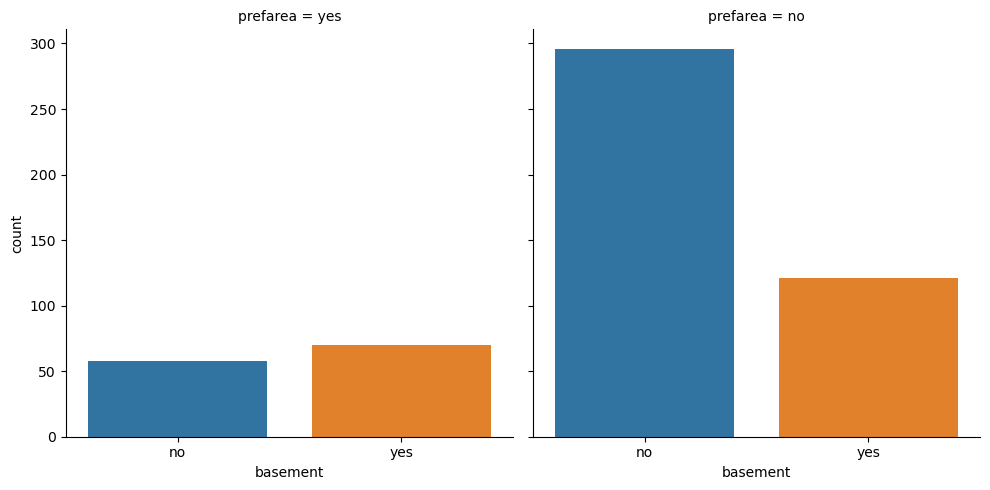

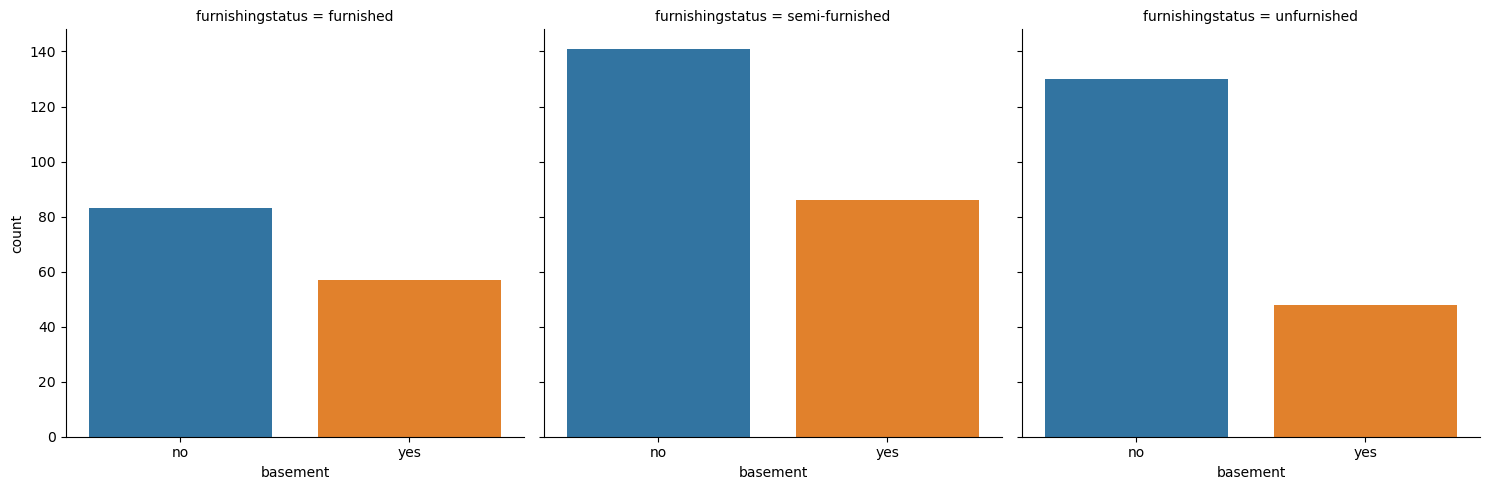

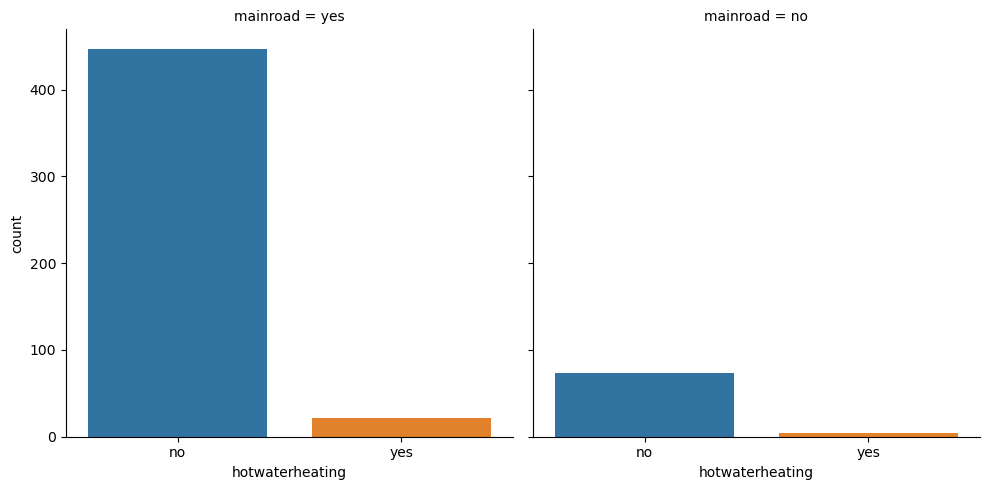

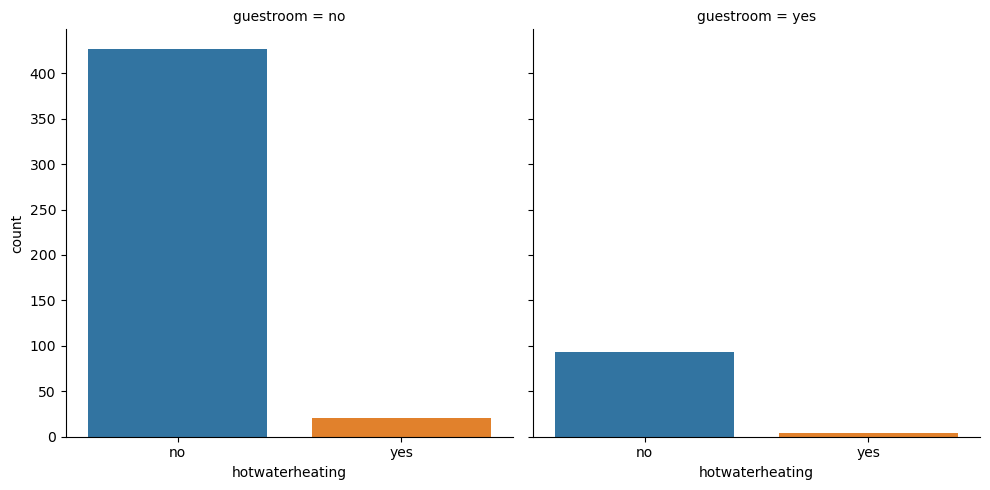

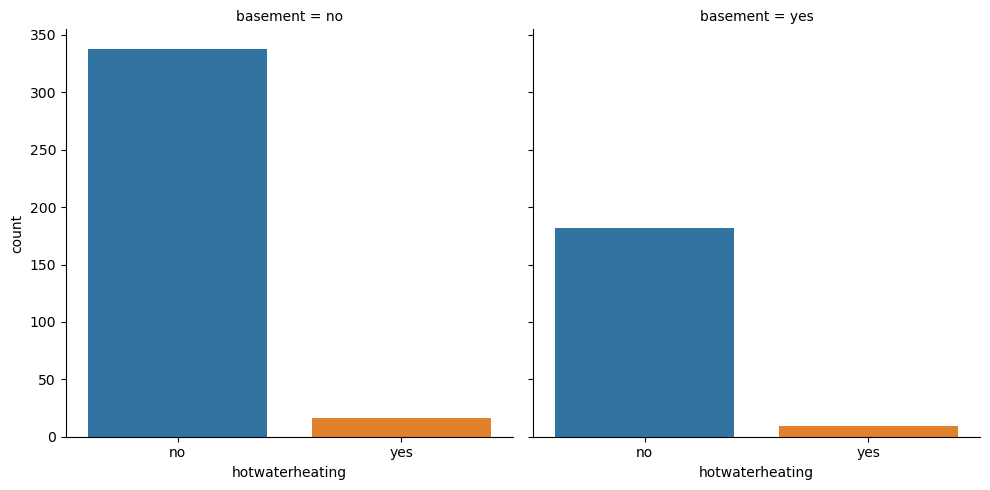

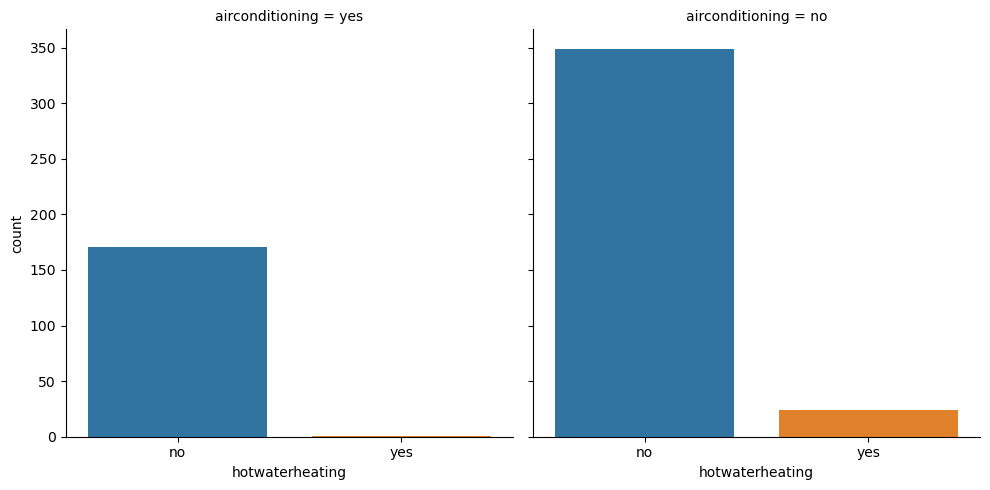

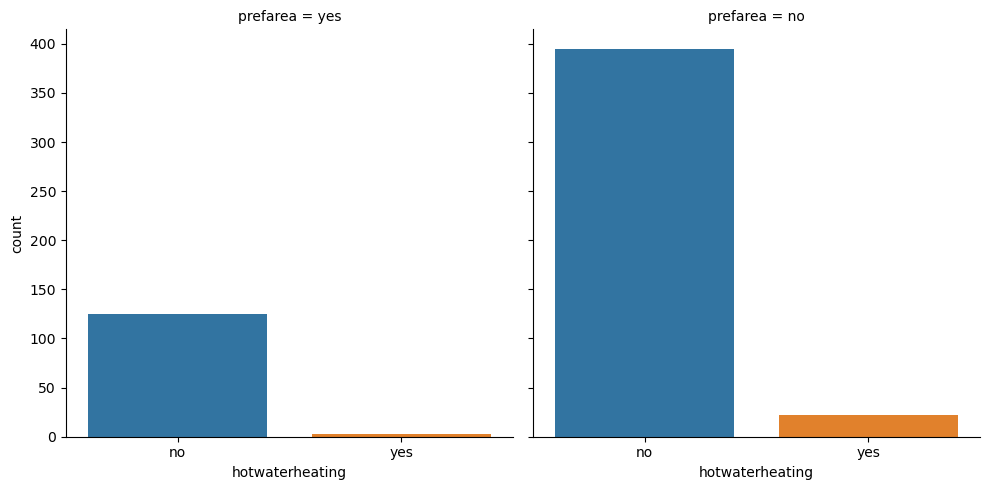

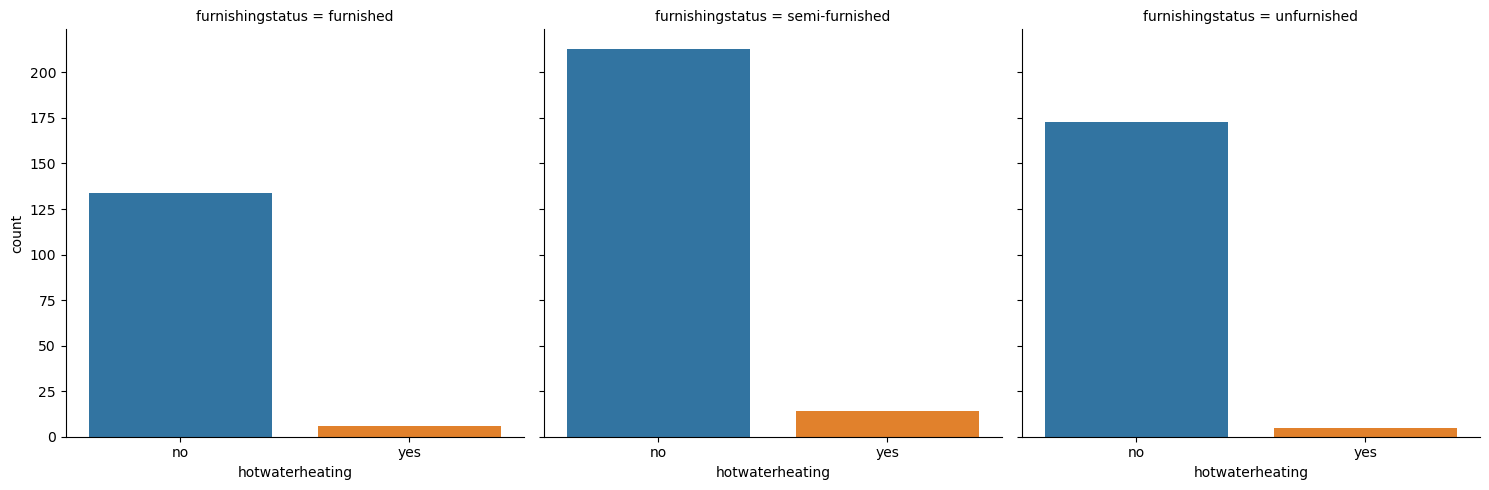

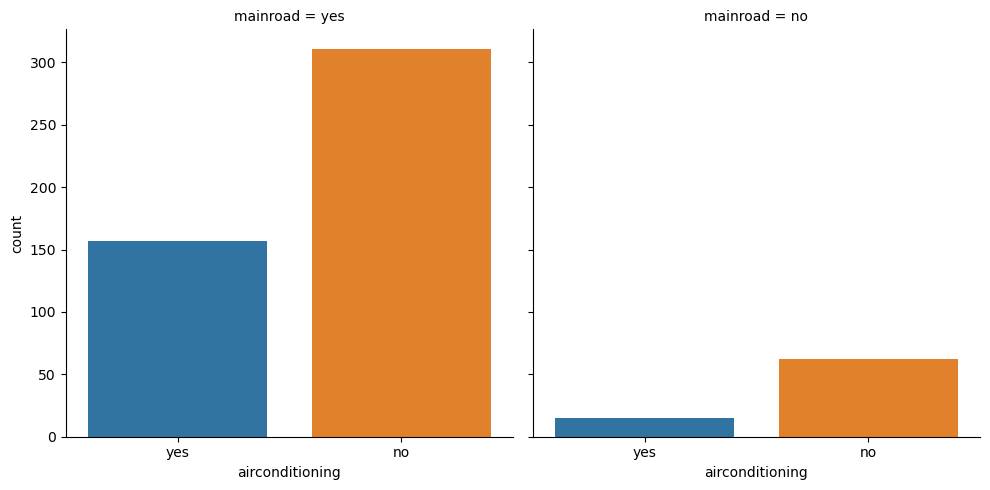

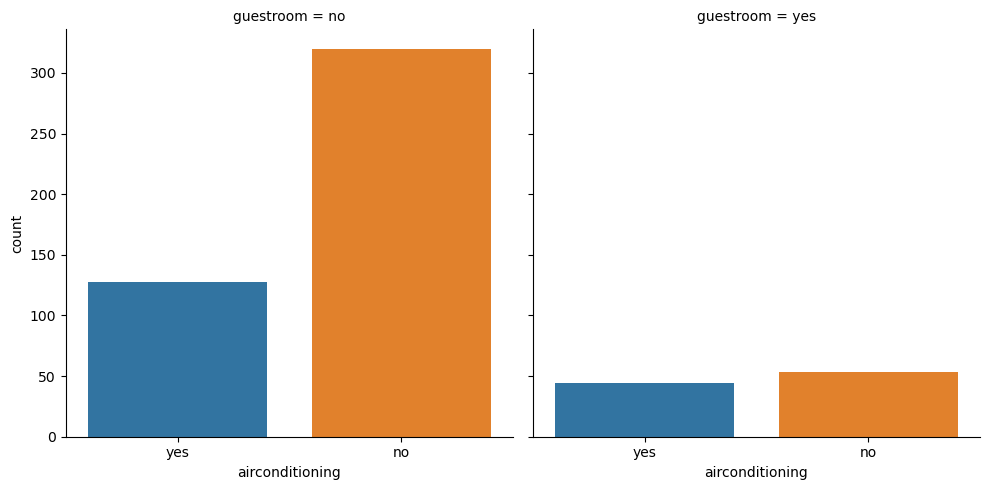

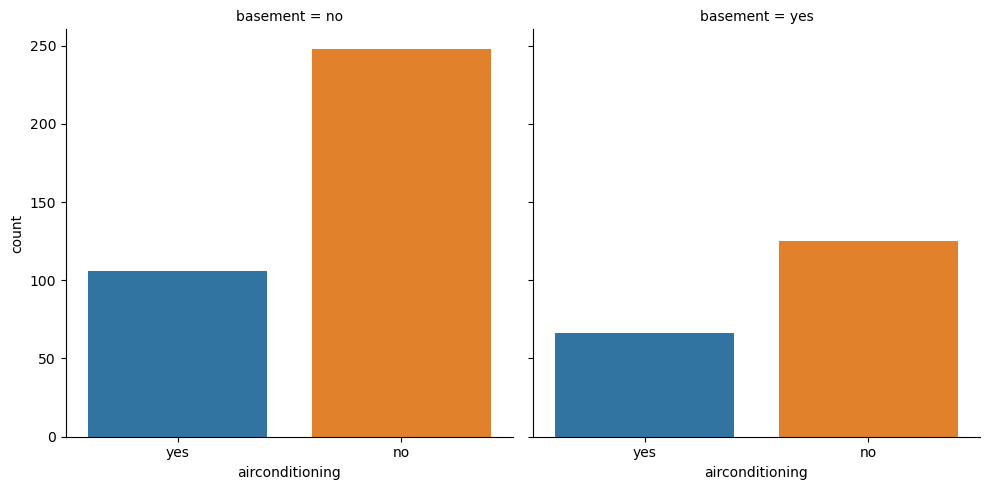

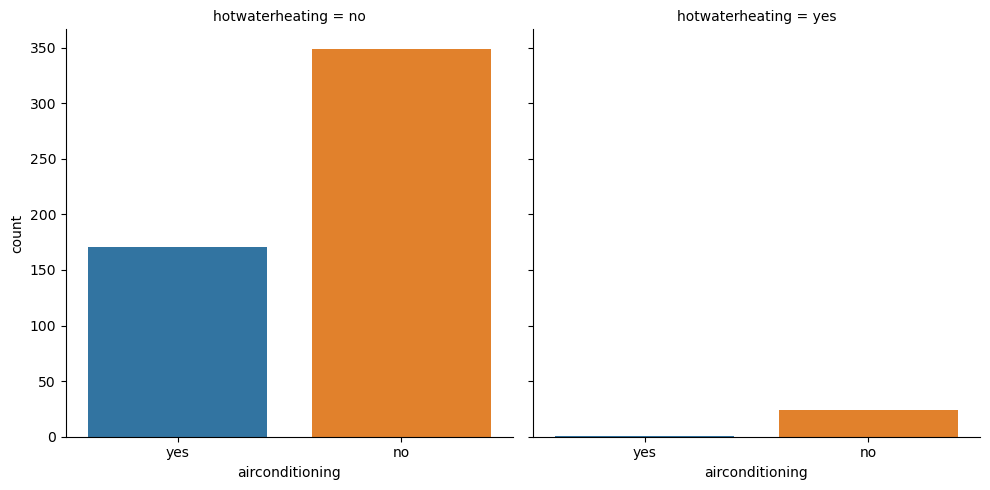

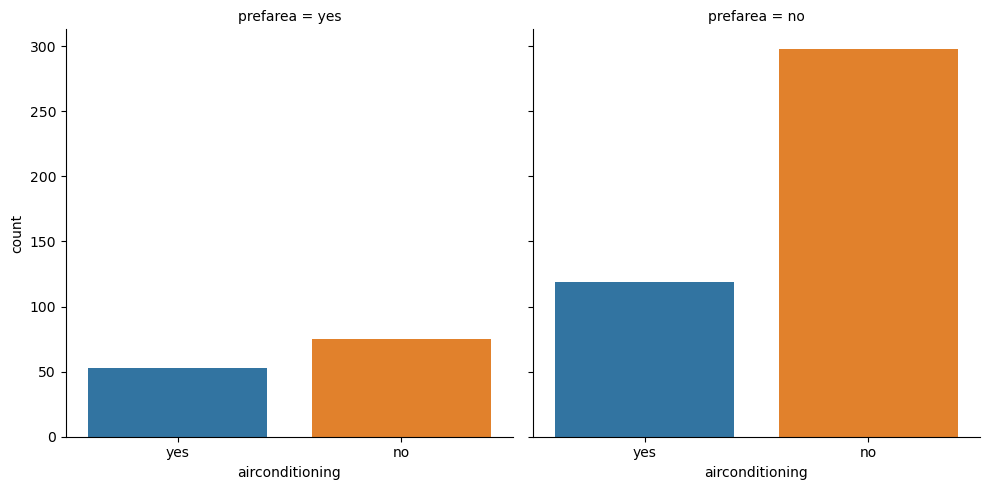

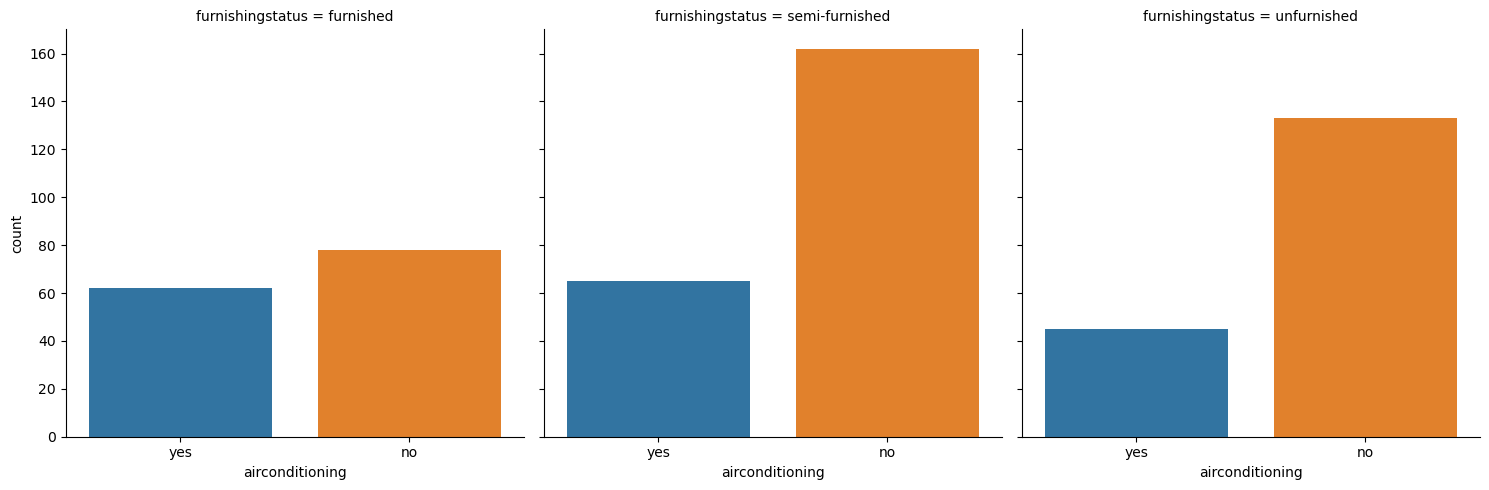

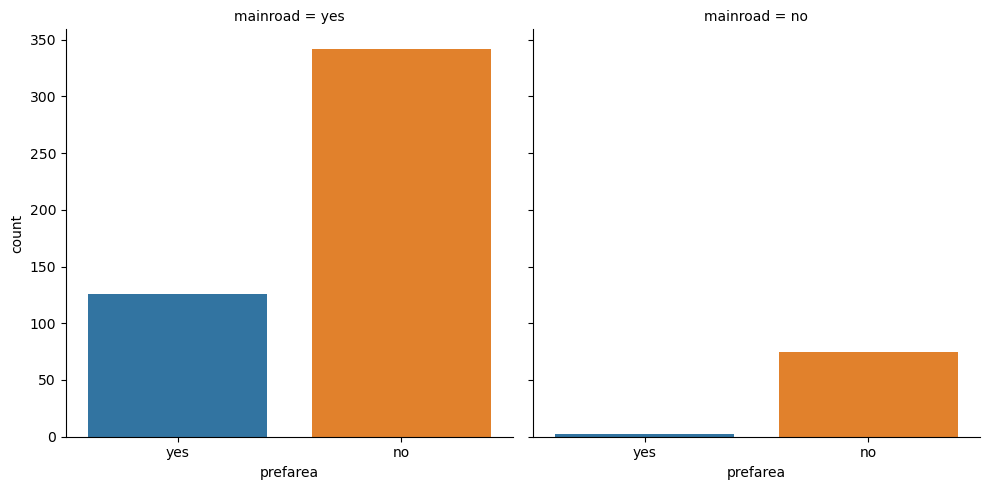

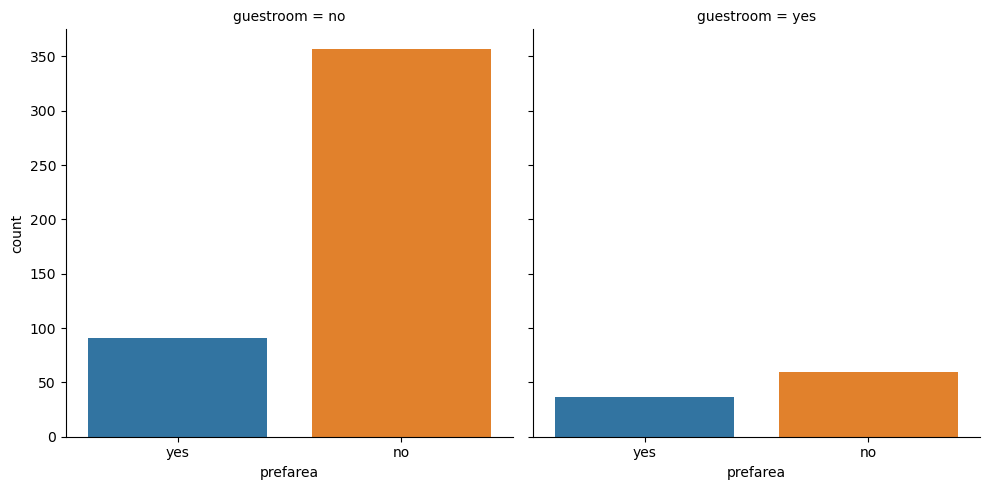

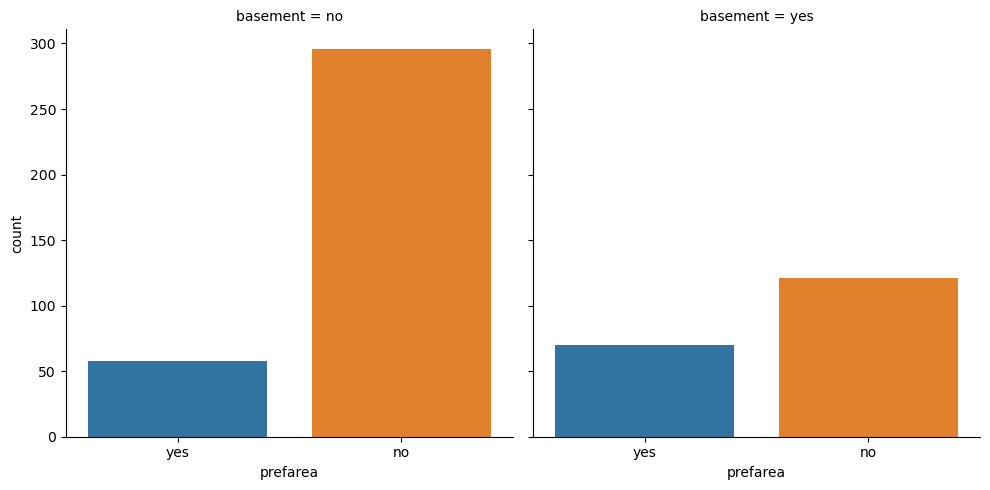

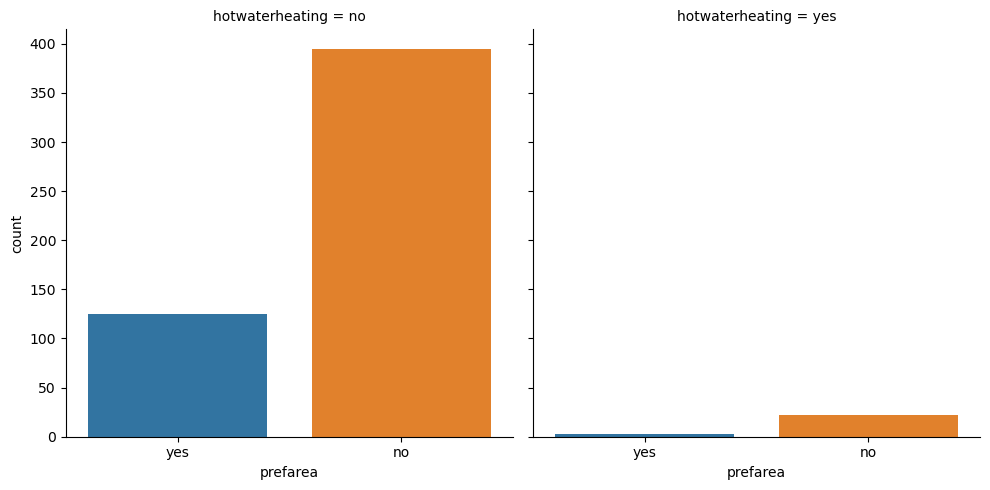

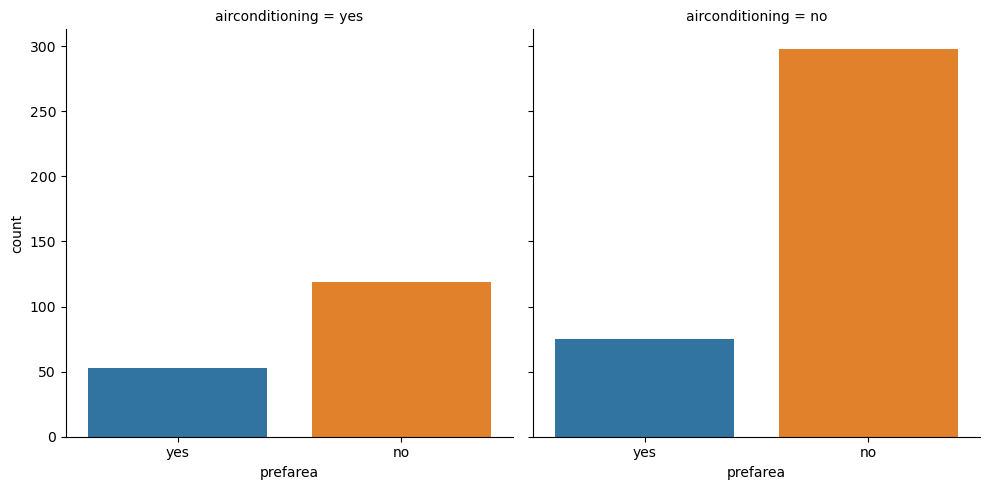

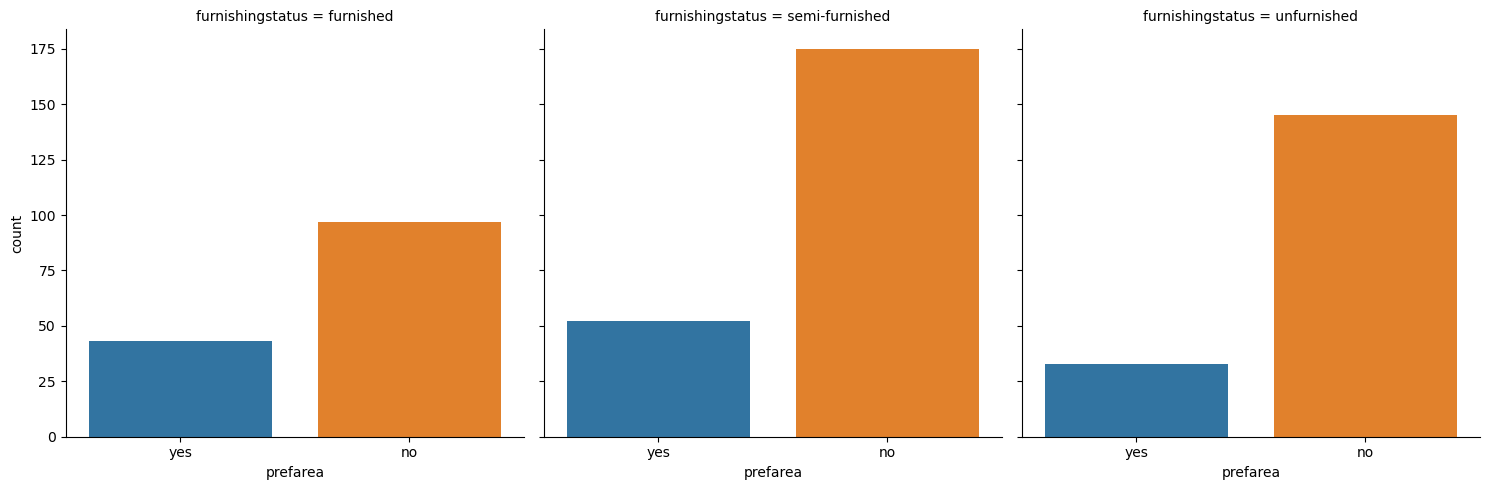

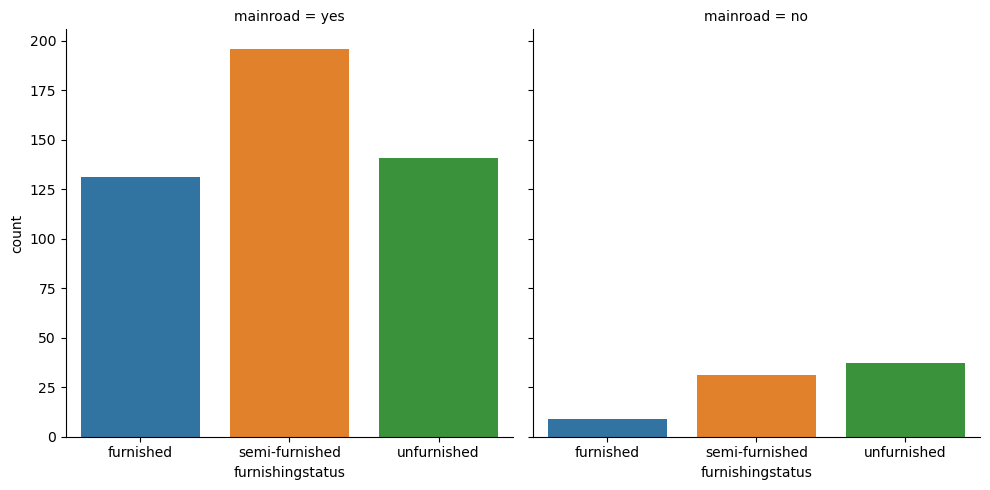

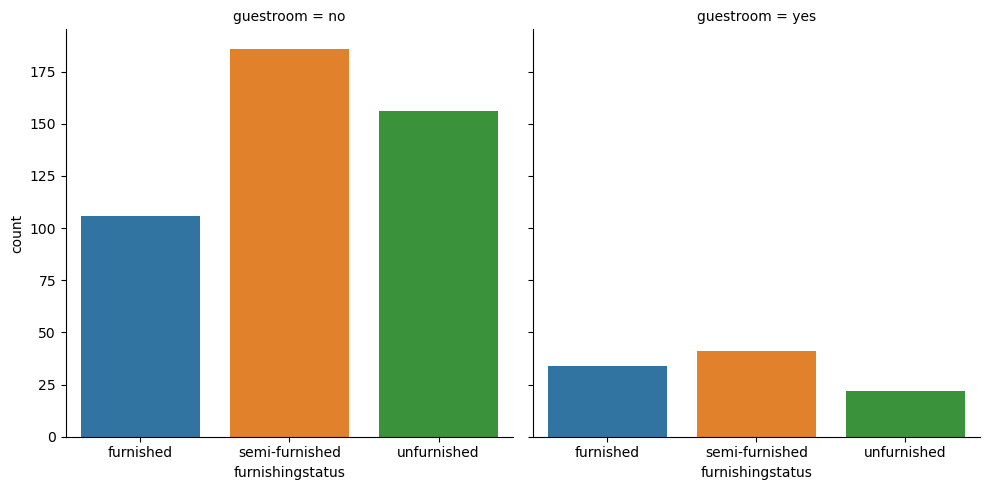

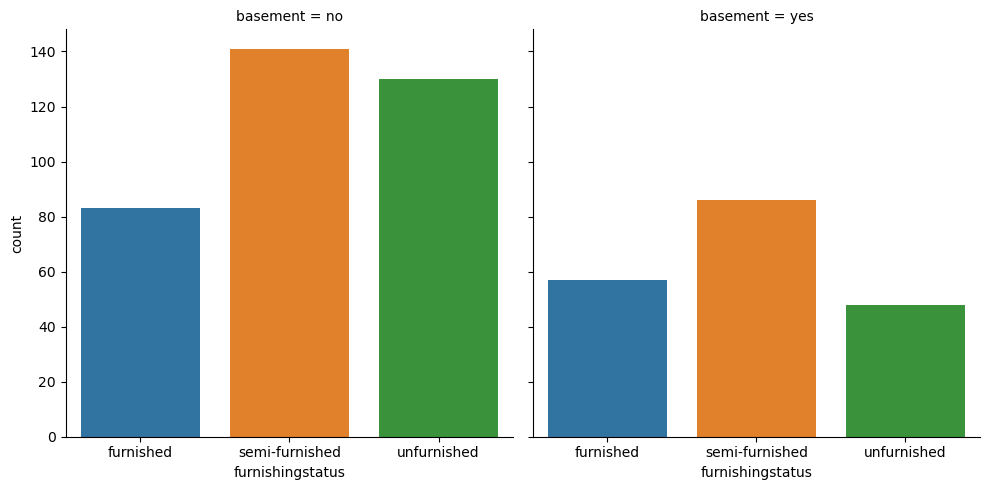

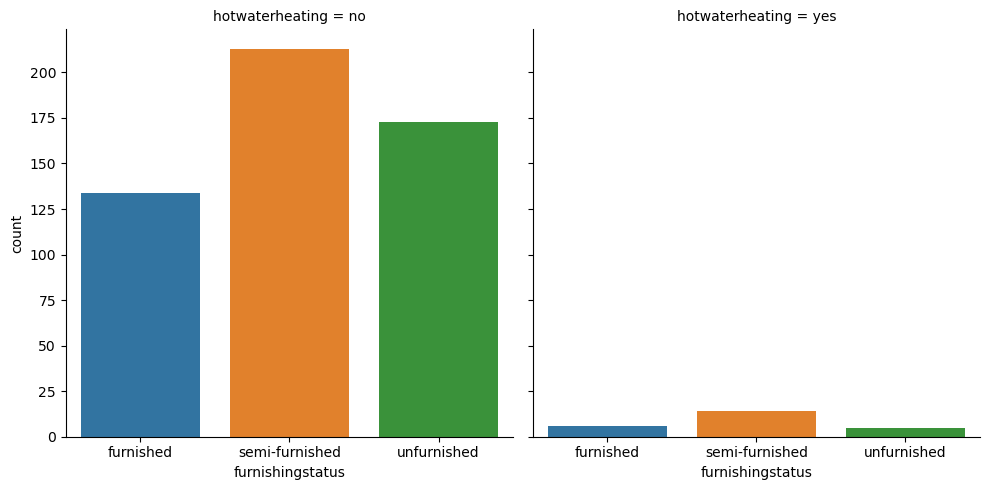

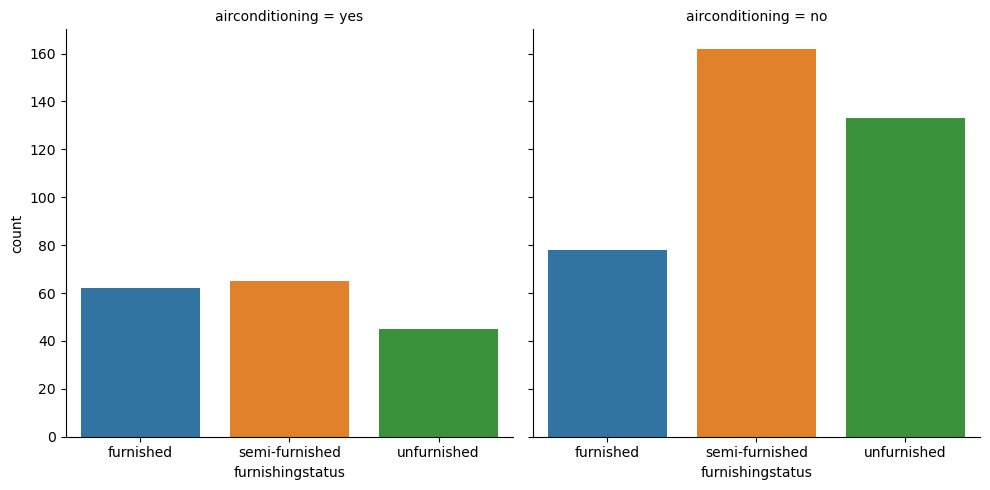

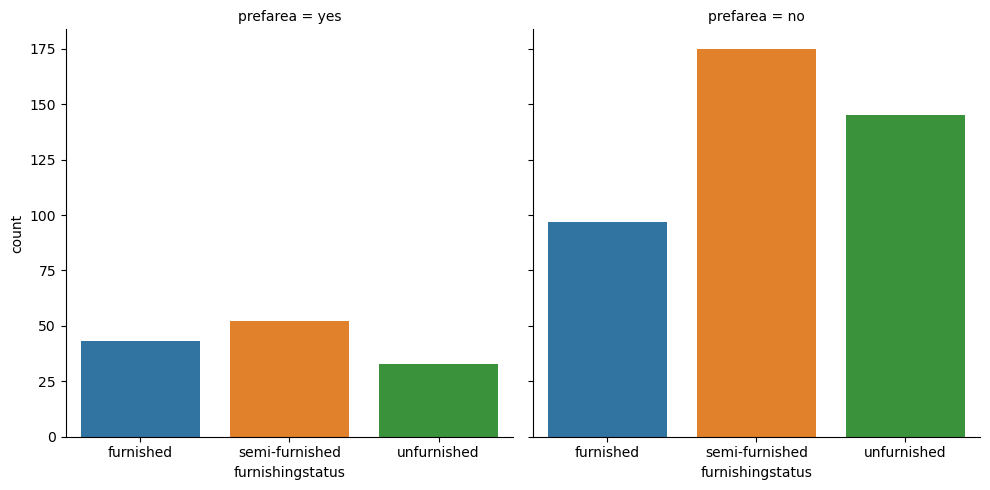

In [83]:
for categ in categorical_features:
    for categ2 in categorical_features:
        if categ == categ2:
            continue
        
        sns.catplot(x=categ, col=categ2, data=X, kind='count')
        plt.show()

Text(0.5, 1.0, 'Correlation of numerical features to price')

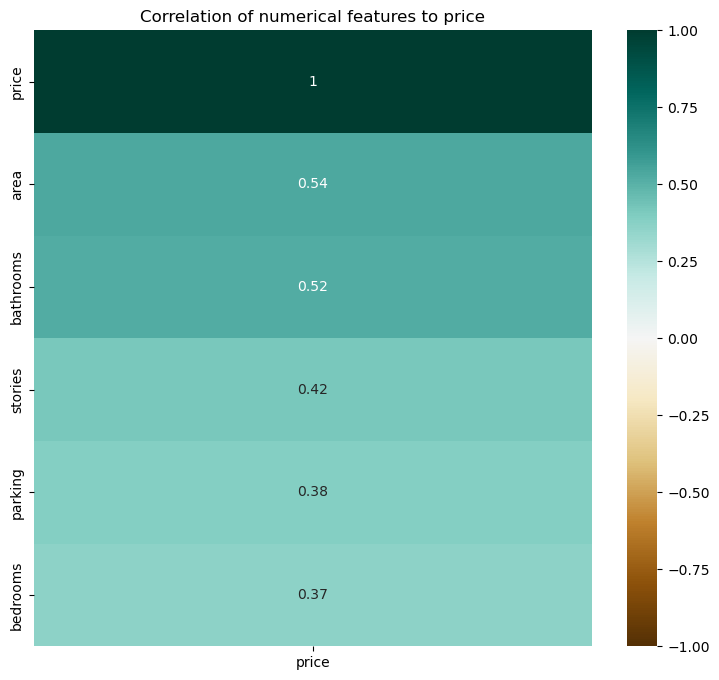

In [84]:
plt.figure(figsize=(9, 8))
sns.heatmap(df.select_dtypes(exclude=['object']).corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG').set_title('Correlation of numerical features to price')

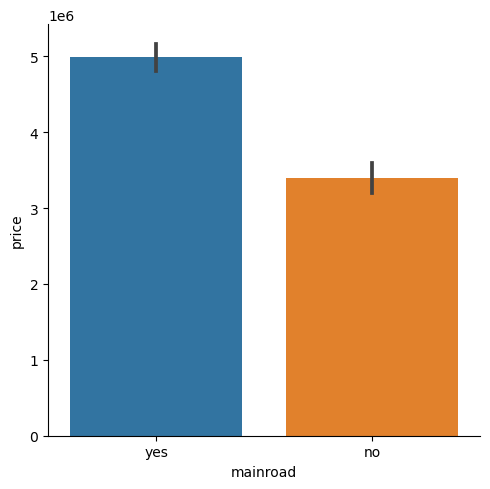

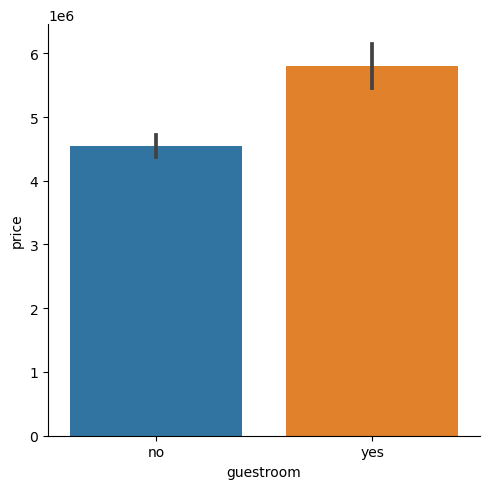

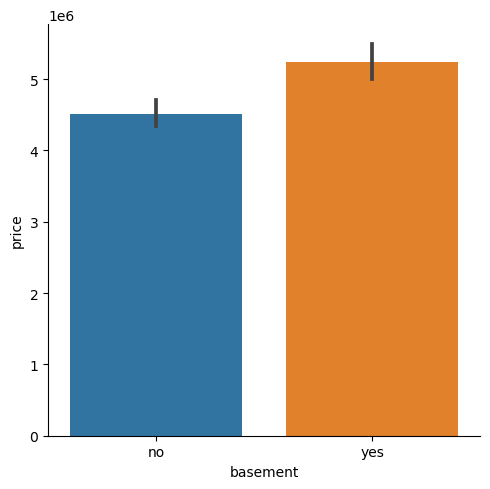

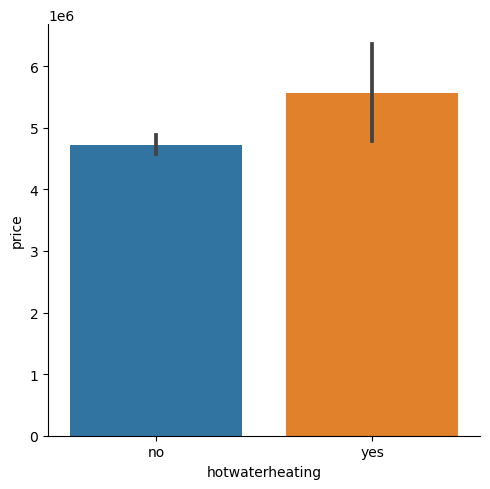

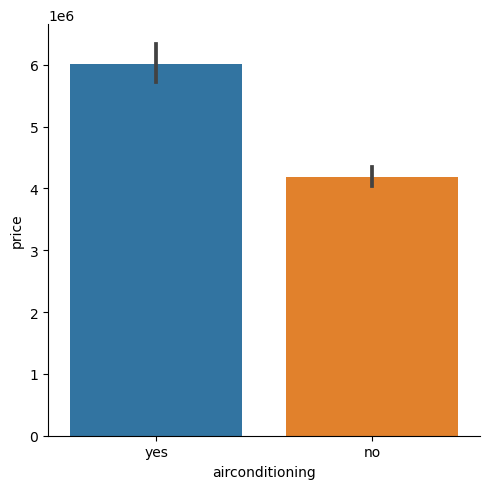

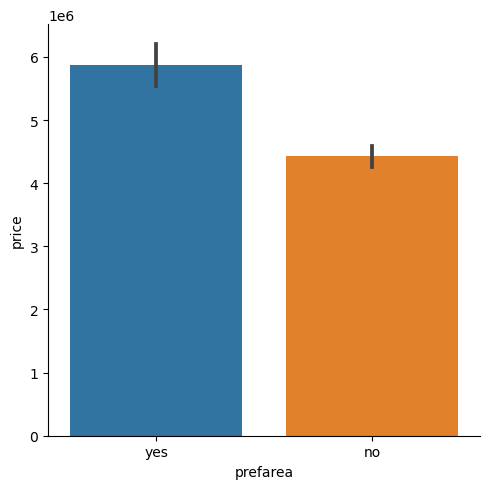

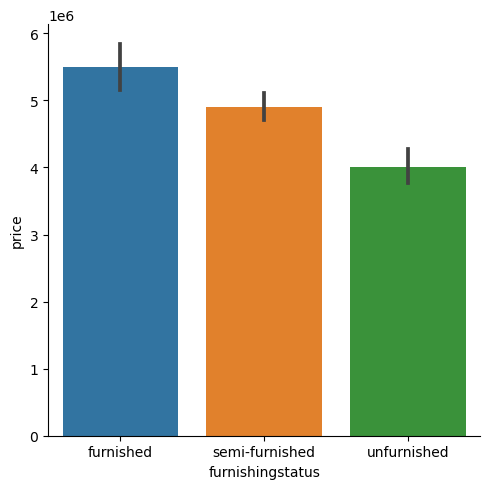

In [85]:
for categ in categorical_features:
    sns.catplot(x=categ, y='price', data=df, kind='bar')
    plt.show()

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.get_dummies(df, drop_first=True)

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)
print(f'Training score: {model.score(X_train, y_train)}')

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
error = (rmse / y_test.mean()) * 100
print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'RMSE: {rmse}')
print(f'Error: {error}%')

Training score: 0.6859438988560158
R2 score: 0.6529242642153184
RMSE: 1324506.9600914388
Error: 26.450269666908838%


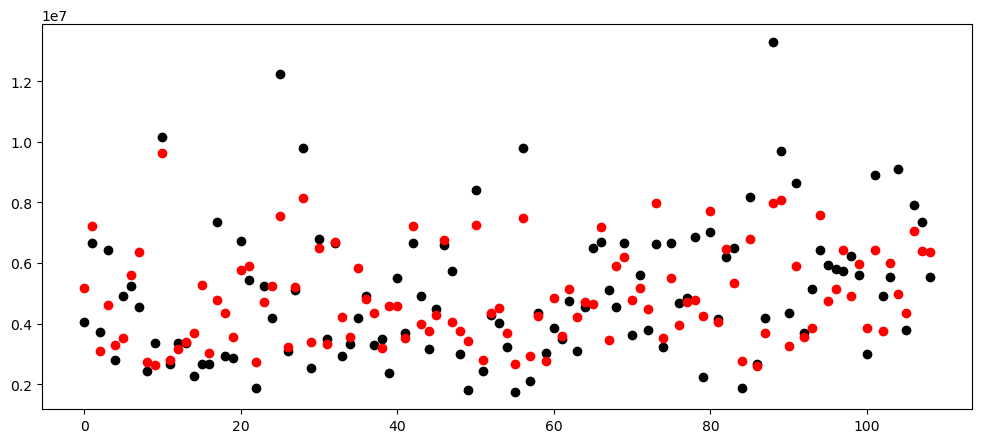

In [88]:
plt.figure(figsize=(12, 5))
r = np.arange(len(y_test))
plt.scatter(r, y_test, color='black', label='Real')
plt.scatter(r, y_pred, color='red', label='Predicted')


In [89]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient':model.coef_,
    'Absolute Coefficient': np.abs(model.coef_)
})
coef_df_sorted = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
coef_df_sorted

,Feature,Coefficient,Absolute Coefficient
2,bathrooms,1.094445e+06,1.094445e+06
9,airconditioning_yes,7.914267e+05,7.914267e+05
8,hotwaterheating_yes,6.846499e+05,6.846499e+05
10,prefarea_yes,6.298906e+05,6.298906e+05
12,furnishingstatus_unfurnished,-4.136451e+05,4.136451e+05
3,stories,4.074766e+05,4.074766e+05
7,basement_yes,3.902512e+05,3.902512e+05
5,mainroad_yes,3.679199e+05,3.679199e+05
6,guestroom_yes,2.316100e+05,2.316100e+05
4,parking,2.248419e+05,2.248419e+05


In [90]:
from scipy.stats import zscore

def analyze_residuals(model, X, y_true):
    y_pred = model.predict(X)
    
    residuals = y_true - y_pred
    
    residuals_zscores = zscore(residuals)
    
    outliers = np.where(np.abs(residuals_zscores) > 3)[0]  # Outliers are beyond +/- 3 standard deviations
    
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title("Residual Plot")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()
    
    return {
     "outliers_count": len(outliers),
        "outliers_indices": outliers
    }

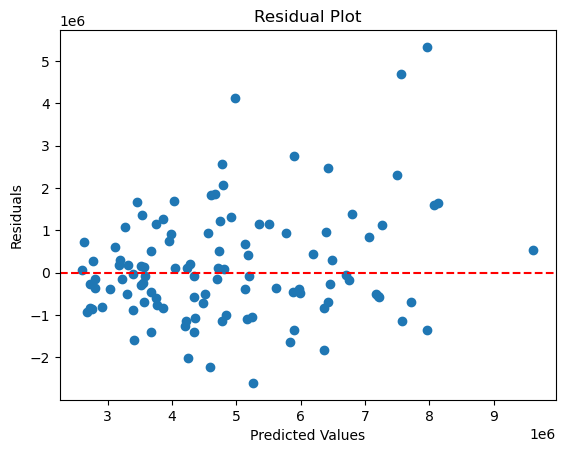

Number of potential outliers detected: 3
Indices of potential outliers: [ 25  88 104]


In [91]:
outlier_analysis = analyze_residuals(model, X_test, y_test)

print("Number of potential outliers detected:", outlier_analysis["outliers_count"])
if outlier_analysis["outliers_count"] > 0:
    print("Indices of potential outliers:", outlier_analysis["outliers_indices"])


In [92]:
print(X_test.iloc[outlier_analysis["outliers_indices"]])
print(y_test.iloc[outlier_analysis["outliers_indices"]].values)

    area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
2   9960         3          2        2        2          True          False   
0   7420         4          2        3        2          True          False   
15  6000         4          1        2        2          True          False   

    basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
2           True                False                False          True   
0          False                False                 True          True   
15          True                False                False         False   

    furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
2                              True                         False  
0                             False                         False  
15                             True                         False  
[12250000 13300000  9100000]


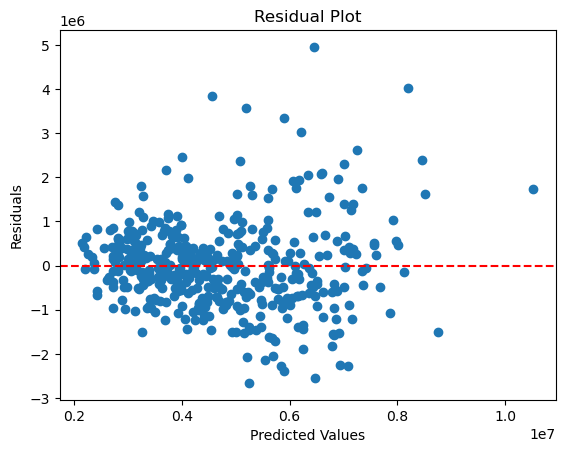

Number of potential outliers detected: 6
Indices of potential outliers: [ 90 292 312 332 389 430]


In [93]:
outlier_analysis = analyze_residuals(model, X_train, y_train)

print("Number of potential outliers detected:", outlier_analysis["outliers_count"])
if outlier_analysis["outliers_count"] > 0:
    print("Indices of potential outliers:", outlier_analysis["outliers_indices"])

In [94]:
print(X_train.iloc[outlier_analysis["outliers_indices"]])
print(y_train.iloc[outlier_analysis["outliers_indices"]].values)

    area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
3   7500         4          2        2        3          True          False   
4   7420         4          1        2        2          True           True   
27  8875         3          1        1        1          True          False   
14  7800         3          2        2        0          True          False   
13  3500         4          2        2        2          True          False   
20  4320         3          1        2        2          True          False   

    basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
3           True                False                 True          True   
4           True                False                 True         False   
27         False                False                False         False   
14         False                False                False          True   
13         False                 True                False 

In [95]:
print(df.shape)
df2 = df.loc[df['price'] < 0.9*10**7]
print(df2.shape)


X = df2.drop(['price'], axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
print(f'Training score: {model.score(X_train, y_train)}')

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
error = (rmse / y_test.mean()) * 100
print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'RMSE: {rmse}')
print(f'Error: {error}%')

(545, 14)
(528, 14)
Training score: 0.6530476824400955
R2 score: 0.7116107593469495
RMSE: 956062.8674697985
Error: 19.990250906322917%


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    bool 
 7   guestroom_yes                    545 non-null    bool 
 8   basement_yes                     545 non-null    bool 
 9   hotwaterheating_yes              545 non-null    bool 
 10  airconditioning_yes              545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_semi-furnished  545 non-null    b

In [97]:
from sklearn.model_selection import KFold, cross_val_score

data = df.loc[df['bathrooms'] < 4]
data = data.loc[(data['bedrooms'] != 1) & (data['bedrooms']!= 6)]

metrics_frame = pd.DataFrame()
models = {}
for feature in data.drop(['price', 'area'], axis=1).columns:
    grouped_data = data.groupby(feature)

    models = {}
    metrics = {}
    
    kf = KFold(n_splits=5, shuffle=True)

    for group_name, group_df in grouped_data:
        X = group_df.drop(columns=['price']) 
        y = group_df['price']
        
        model = LinearRegression()

        rmse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
        r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

        metrics[group_name] = {
            'Average RMSE': np.mean(rmse_scores),
            'Average R2': np.mean(r2_scores),
        }
        
    avg_rmse = np.mean([m['Average RMSE'] for m in metrics.values()])
    avg_r2 = np.mean([m['Average R2'] for m in metrics.values()])
    
    metrics_frame = metrics_frame._append({
        'Feature': feature,
        'Average RMSE': avg_rmse,
        'Average R2': avg_r2
    }, ignore_index=True)

metrics_frame = metrics_frame.sort_values(by='Average RMSE', ascending=True)
metrics_frame

,Feature,Average RMSE,Average R2
4,mainroad_yes,9.331878e+05,0.444414
0,bedrooms,1.063620e+06,0.477131
11,furnishingstatus_unfurnished,1.076314e+06,0.620257
10,furnishingstatus_semi-furnished,1.094245e+06,0.600011
8,airconditioning_yes,1.133622e+06,0.564677
9,prefarea_yes,1.162210e+06,0.577509
5,guestroom_yes,1.164825e+06,0.521150
6,basement_yes,1.168066e+06,0.544375
2,stories,1.369649e+06,-4.407701
7,hotwaterheating_yes,1.472480e+06,-0.011499
